## Initialization

### Imports

In [66]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, replace
from typing import Callable

### Equipment

In [41]:
from dataclasses import dataclass

class ArmorAugment:
    NONE = (0, 0)
    DEFENSE = (-2, 1)
    EVASION = (2, -1)

class WeaponAugment:
    SPEED = (0.7, 2/3)
    DAMAGE = (1.5, 5/3)
    NONE = (1, 1)

@dataclass
class Armor():
    base_defense: tuple[int, int]
    defense_scaling: tuple[int, int]
    strength: int
    name: str

@dataclass
class ArmorInstance:
    armor: Armor
    upgrade: int
    augment: ArmorAugment
    isStone: bool = False

    def _get_augment_phrase(self):
        armor_augment_phrase = ""
        if self.augment == ArmorAugment.DEFENSE:
            armor_augment_phrase = " (defense)"
        elif self.augment == ArmorAugment.EVASION:
            armor_augment_phrase = " (evasion)"
        return armor_augment_phrase

    def get_name_and_aug(self):
        return f'{self.armor.name}{self._get_augment_phrase()}'

    def get_full_name(self):
        
        return f'+{self.upgrade} {self.get_name_and_aug()}'


# base damage of armor
class Armors:
    cloth = Armor((0, 2), (0, 1), 10, "cloth armor")
    leather = Armor((0, 3), (0, 1), 12, "leather armor")
    mail = Armor((0, 4), (0, 1), 14, "mail armor")
    scale = Armor((0, 5), (0, 1), 16, "scale armor")
    plate = Armor((0, 6), (0, 1), 18, "plate armor")

@dataclass
class Weapon:
    base_damage: tuple[int, int]
    damage_scaling: tuple[int, int]
    strength: int
    name: str
    accuracy_multiplier: float = 1
    delay: float = 1
    defense: tuple[int, int] = (0, 0)
    defense_scaling: tuple[int, int] = (0, 0)
    effective_surprise_attack: bool = False
    no_surprise_attack: bool = False

@dataclass
class WeaponInstance:
    weapon: Weapon
    upgrade: int = 0
    augment: WeaponAugment = WeaponAugment.NONE

    def _get_augment_phrase(self):
        weapon_augment_phrase = ""
        if self.augment == WeaponAugment.DAMAGE:
            weapon_augment_phrase = " (damage)"
        elif self.augment == WeaponAugment.SPEED:
            weapon_augment_phrase = " (speed)"
        return weapon_augment_phrase

    def get_name_and_aug(self):
        return f'{self.weapon.name}{self._get_augment_phrase()}'

    def get_full_name(self):
        return f'+{self.upgrade} {self.get_name_and_aug()}'

class Weapons:
    worn_shortsword = Weapon((1,10), (1,2), 10, 'worn shortsword')
    dagger = Weapon((1,8), (1,2), 10,  'dagger', effective_surprise_attack=True)
    studded_gloves = Weapon((1,5), (1,1), 10,  'studded gloves', delay=0.5)
    rapier = Weapon((1,8), (1,2), 10,  'rapier', defense=(0,1))
    cudgel = Weapon((1,8), (1,2), 10,  'cudgel', accuracy_multiplier=1.4)
    staff = Weapon((1,6), (1,2), 10,  "mage's staff")
    shortsword = Weapon((2,15), (1,3), 12, 'shortsword')
    handaxe = Weapon((2,12), (1,3), 12, 'hand axe', accuracy_multiplier=1.32)
    spear = Weapon((2,20), (1,4), 12, 'spear', delay=1.5)
    dirk = Weapon((2,12), (1,3), 12, 'dirk', effective_surprise_attack=True)
    quarterstaff = Weapon((2,12), (1,3), 12, 'quarterstaff', defense=(0, 2))
    sickle = Weapon((2,20), (1,3), 12, 'sickle', accuracy_multiplier=0.68)
    pickaxe = Weapon((2,15), (1,3), 14, 'pickaxe')
    sword = Weapon((3,20), (1,4), 14, 'sword')
    mace = Weapon((3,16), (1,4), 14, 'mace', accuracy_multiplier=1.28)
    scimitar = Weapon((3,16), (1,4), 14, 'scimitar', delay=0.8)
    sai = Weapon((3,10), (1,2), 14, 'sai', delay=0.5)
    round_shield = Weapon((3,12), (1,2), 14, 'round shield', defense=(0,4), defense_scaling=(0,1))
    whip = Weapon((3,15), (1,3), 14, 'whip')
    longsword = Weapon((4,25), (1,5), 16, 'longsword')
    battleaxe = Weapon((4,20), (1,5), 16, 'battleaxe', accuracy_multiplier=1.24)
    flail = Weapon((4,35), (1,8), 16, 'flail', accuracy_multiplier=0.8, no_surprise_attack=True)
    assassins_blade = Weapon((4,20), (1,5), 16, "assassin's blade", effective_surprise_attack=True)
    runic_blade = Weapon((4,20), (1,6), 16, 'runic blade')
    crossbow = Weapon((4,20), (1,4), 16, 'crossbow')
    katana = Weapon((4,20), (1,5), 16, 'katana', defense=(0, 3))
    greatsword = Weapon((5,30), (1,6), 18, 'greatsword')
    warhammer = Weapon((5,24), (1,6), 18, 'war hammer', accuracy_multiplier=1.2)
    glaive = Weapon((5,40), (1,8), 18, 'glaive',delay=1.5)
    greataxe = Weapon((5,45), (1,6), 20, 'great axe')
    greatshield = Weapon((5,18), (1,3), 18, 'greatshield', defense=(0,6), defense_scaling=(0, 2))
    stone_gauntlet = Weapon((5,15), (1,3), 18, 'stone gauntlet', delay=0.5)
    war_scythe = Weapon((5,40), (1,6), 18, 'war scythe', accuracy_multiplier=0.8)

class ThrownWeapons:
    throwing_stone = Weapon((2,5), (1,1), 9, 'throwing stone')
    throwing_knife = Weapon((2,6), (1,1), 9, 'throwing knife', effective_surprise_attack=True)
    throwing_spike = Weapon((2,5), (1,1), 9, 'throwing spike')
    dart = Weapon((1,2), (1,2), 9, 'dart')
    fishing_spear = Weapon((4,10), (1,2), 11, 'fishing spear')
    throwing_club = Weapon((4,8), (1,2), 11, 'throwing club')
    shuriken = Weapon((4,8), (1,2), 11, 'shuriken', effective_surprise_attack=True)
    throwing_spear = Weapon((6,15), (1,3), 13, 'throwing spear')
    kunai = Weapon((6,12), (1,3), 13, 'kunai', effective_surprise_attack=True)
    bolas = Weapon((6,9), (1,2), 13, 'bolas')
    javelin = Weapon((8,20), (1,4), 15, 'javelin')
    tomahawk = Weapon((6,16), (1,3), 15, 'tomahawk')
    boomerang = Weapon((8,16), (1,4), 15, 'heavy boomerang')
    trident = Weapon((10,25), (1,5), 17, 'trident')
    throwing_hammer = Weapon((10,20), (1,5), 17, 'throwing hammer')
    trident = Weapon((10,20), (1,5), 17, 'force cube')


### Creatures

In [42]:
@dataclass
class Creature:
    hp: int
    armor: list[tuple[int, int]]
    accuracy: int
    evasion: int
    damage: tuple[int, int]
    name: str
    attack_speed: float = 1.0

class Creatures:
    rat =           Creature(8,[(0,1)], 8, 2, (1,4), "rat")
    snake =         Creature(4,[(0,0)], 10, 25, (1,4), "snake")
    gnoll =         Creature(12,[(0,2)], 10, 4, (1,6), "gnoll")
    crab =          Creature(15,[(0,4)], 12, 5, (1,7), "crab")
    slime =         Creature(20,[(0,0)], 12, 5, (2,5), "slime")
    flies =         Creature(50,[(0,0)], 10, 5, (1,4), "swarm of flies")
    skeleton =      Creature(25,[(0,5)], 12, 9, (2,10), "skeleton")
    thief =         Creature(20,[(0,3)], 12, 12, (1,10), "crazy thief", attack_speed=0.5)
    necromancer =   Creature(40,[(0,5)], 12, 14, (2,10), "necromancer")
    guard =         Creature(40,[(0,7)], 12, 10, (4,12), "guard")
    dm100 =         Creature(20,[(0,4)], 11, 8, (2,8), "DM100")
    bat =           Creature(30,[(0,4)], 16, 15, (5,18), "vampire bat")
    brute =         Creature(40,[(0,8)], 20, 15, (5,25), "gnoll brute")
    shaman =        Creature(35,[(0,6)], 18, 15, (5,10), "gnoll shaman")
    spider =        Creature(50,[(0,6)], 20, 14, (10,20), "cave spider")
    dm200 =         Creature(80,[(0,8)], 25, 8, (10,25), "DM200")
    ghoul =         Creature(45,[(0,4)], 24, 20, (16,22),"dwarven ghoul")
    elemental =     Creature(65,[(0,5)], 25, 20, (20,25), "elemental")
    warlock =       Creature(70,[(0,8)], 25, 18, (16,22), "dwarf warlock")
    monk =          Creature(68,[(0,2)], 30, 30, (12,25), "dwarf monk", attack_speed=0.5)
    golem =         Creature(120,[(0,12)], 28, 15, (25,30), "golem")
    succubus =      Creature(80,[(0,10)], 40, 25, (25,30), "succubus")
    eye =           Creature(100,[(0,10)], 30, 20, (20,30), "evil eye")
    scorpio =       Creature(110,[(0,16)], 36, 24, (30,40), "scorpio")
    demon =         Creature(60,[(0,4)], 30, 22, (15,25), "demon ripper", attack_speed=0.5)
    goo =           Creature(120,[(0,2)], 10, 8, (1,8), "Goo")
    goo_enraged =   Creature(120,[(0,2)], 15, 8 * 1.5, (1,12), "Goo (enraged)")
    tengu =         Creature(250,[(0,5)], 20, 15, (6,12), "Tengu")
    dm300 =         Creature(400,[(0,10)], 20, 15, (15,25), "DM300")
    dk =            Creature(450,[(0,10)], 26, 22, (15,25), "Dwarf King")
    fist =          Creature(300,[(0,15)], 36, 20, (18,36), "Yog Fist")


### Helper functions

In [43]:
def calc_hit_rate(accuracy, evasion):
    if evasion >= accuracy:
        return accuracy / (2 * evasion)
    else:
        return 1 - evasion / (2 * accuracy)

def calc_percent_change(original, new):
    return (new - original)/original * 100

def calc_final_damage(damage, defense):
    return max(0, damage - defense)

def calc_strength_reduction(upgrade):
    return math.floor((1/2)*(-1 + math.sqrt(1 + 8 * upgrade)))

def calc_defense_interval_fima(base_armor, armor_level, armor_augment):
    base_armor_max = base_armor[1]
    max_defense = base_armor_max + armor_level + armor_augment[1] * (armor_level + 2)
    return (base_armor[0], max_defense)

def calc_armor_defense(armor: ArmorInstance):
    return np.array(calc_defense_interval_fima(armor.armor.base_defense, armor.armor.defense_scaling, armor.augment))

def calc_weapon_defense(weapon: WeaponInstance):
    return np.array(weapon.weapon.defense) + weapon.upgrade * np.array(weapon.weapon.defense_scaling)

def calc_final_evasion(base_evasion, armor_level, armor_augment, evasion_multiplier):
    return base_evasion * evasion_multiplier + armor_augment[0] * (armor_level + 2)

def calc_damage_interval(weapon: WeaponInstance, is_surprise: bool = False):
    damage_interval = np.array(weapon.weapon.base_damage)
    damage_scaling = np.array(weapon.weapon.damage_scaling)
    upgrade_level = weapon.upgrade
    damage_range = damage_interval + damage_scaling * upgrade_level
    if is_surprise and weapon.weapon.effective_surprise_attack:
        diff = damage_range[1] - damage_range[0]
        damage_range[0] = damage_range[0] + round(diff * 0.67)
    augment_factor = weapon.augment[0]
    return np.round(damage_range * augment_factor)

def triangular_discrete(low, high):
    # min + (int)((Float() + Float()) * (max - min + 1) / 2f);
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    return low + math.floor((u1 + u2) * (high - low + 1) / 2)

def roll_ranges(ranges):
    return sum(max(0, triangular_discrete(x[0], x[1])) for x in ranges)

def roll_damage_taken(defense_intervals, damage_intervals, hit_chance):
    defense_roll = roll_ranges(defense_intervals)
    damage_roll = roll_ranges(damage_intervals)
    evasion_roll = 1 if random.uniform(0, 1) < hit_chance else 0
    return evasion_roll * calc_final_damage(damage_roll, defense_roll)

def roll_damage_taken_stone(defense_intervals, damage_intervals, hit_chance):
    defense_roll = roll_ranges(defense_intervals)
    damage_roll = roll_ranges(damage_intervals)
    stone_multiplier = calc_stone_multiplier(hit_chance)
    return stone_multiplier * calc_final_damage(damage_roll, defense_roll)

def roll_skeleton_explosion_damage_taken(defense_intervals):
    defense_roll = roll_ranges(defense_intervals) + roll_ranges(defense_intervals)
    damage_roll = roll_ranges([(6,12)])
    return calc_final_damage(damage_roll, defense_roll)

def simulate_damage(defense_intervals, damage_intervals, hit_chance, num_iterations):
    data_points = []
    for _ in range(num_iterations):
        damage = roll_damage_taken(defense_intervals, damage_intervals, hit_chance)
        data_points.append(damage)
    return data_points

def calc_stone_multiplier(hit_rate):
    dr = ((1 + 3 * hit_rate) / 4)
    dr = 0.25 if dr < 0.25 else dr
    dr = 1 if dr > 1 else dr
    return dr

def ferret_tuft_multiplier(boost: int):
    return 1 + 0.125 * boost

def accuracy_ring_multiplier(boost: int):
    return 1.3 ** boost

def furor_ring_multiplier(boost: int):
    return 1.09051 ** boost

def evasion_ring_multiplier(boost: int):
    return 1.125 ** boost

### Creature constructor

In [83]:
def create_animated_statue(depth: int, weapon: WeaponInstance, armor: ArmorInstance = None):
    hp = 15 + 5 * depth
    evasion = 4 + depth
    accuracy = (9 + depth) * weapon.weapon.accuracy_multiplier
    attack_speed = weapon.weapon.delay
    
    # for some reason, defenses from weapon are just added to base defense and doesn't have its own roll
    defense = [np.array([0, depth]) + calc_weapon_defense(weapon), (0,0) if armor is None else calc_armor_defense(armor)]
    damage = calc_damage_interval(weapon)

    equipment_description = f'{weapon.get_full_name()}{"" if armor is None else f" {armor.get_full_name()}" }'
    return Creature(hp, defense, accuracy, evasion, damage, f'depth {depth} {equipment_description} statue', attack_speed)

def create_piranha(depth: int):
    hp = 10 + 5 * depth
    damage = (depth, 4 + depth * 2)
    defense = [(0, depth)]
    accuracy = 20 + depth * 2
    evasion = 10 + depth * 2
    return Creature(hp, defense, accuracy, evasion, damage, f'depth {depth} piranha')


### Data objects

In [46]:
@dataclass
class Hero:
    level: int
    strength: int
    armor: ArmorInstance
    weapon: WeaponInstance
    turn: float = 0.0
    damage_taken: int = 0
    arcana_multiplier: float = 1.0
    evasion_multiplier: float = 1.0
    accuracy_multiplier: float = 1.0
    attack_speed_multiplier: float = 1.0
    tenacity_boost: int = 0
    ferret_tuft_boost: int = 0
        
    def _get_strength_surplus(self):
        return self.strength - self.weapon.weapon.strength + calc_strength_reduction(self.weapon.upgrade)
    
    def get_ht(self):
        return self.level * 5 + 15
    
    def get_strength_bonus(self):
        return max(self._get_strength_surplus(), 0)
    
    def get_encumberment(self):
        return max(-self._get_strength_surplus(), 0)
    
    def get_accuracy(self):
        base_accuracy = self.level + 9
        return base_accuracy * self.weapon.weapon.accuracy_multiplier * self.accuracy_multiplier / (1.5 ** self.get_encumberment())

    def get_evasion(self):
        base_evasion = self.level + 4
        return calc_final_evasion(base_evasion, self.armor.upgrade, self.armor.augment, self.evasion_multiplier) * ferret_tuft_multiplier(self.ferret_tuft_boost)
    
    def get_attack_speed(self):
        return (self.weapon.augment[1] * self.weapon.weapon.delay) * (1.2 ** self.get_encumberment()) / self.attack_speed_multiplier
    
    def get_defense_intervals(self):
        return [calc_defense_interval_fima(self.armor.armor.base_defense, self.armor.upgrade, self.armor.augment),
                            calc_weapon_defense(self.weapon) - 2 * self.get_encumberment()]

    def get_tenacity_multiplier(self):
        return 0.85 ** (self.tenacity_boost * (self.damage_taken / self.get_ht()))
    
    def take_damage(self, damage: int):
        self.damage_taken += math.ceil(damage * self.get_tenacity_multiplier())

class ChampionVariant:
    NONE = 'none'
    BLAZING = 'blazing'
    PROJECTING = 'projecting'
    ANTIMAGIC = 'antimagic'
    GIANT = 'giant'
    BLESSED = 'blessed'
    GROWING = 'growing'

class CreatureInstance:
    creature: Creature
    damage_taken: int
    turn: float
    champion: ChampionVariant

    def __init__(self, creature: Creature, champion: ChampionVariant = ChampionVariant.NONE):
        self.creature = creature
        self.damage_taken = 0
        self.turn = 0
        self.champion = champion

    def get_accuracy(self):
        match self.champion:
            case ChampionVariant.BLESSED:
                return self.creature.accuracy * 4
            case _:
                return self.creature.accuracy
    
    def get_evasion(self):
        match self.champion:
            case ChampionVariant.BLESSED:
                return self.creature.evasion * 4
            case _:
                return self.creature.evasion

def hero_attacks_enemy(hero: Hero, enemy: CreatureInstance, is_surprise: bool, bonus_damage: list[tuple[int, int]] = [], debug: bool = False):
    hit_rate = 1 if is_surprise and not hero.weapon.weapon.no_surprise_attack else calc_hit_rate(hero.get_accuracy() , enemy.get_evasion() * ferret_tuft_multiplier(hero.ferret_tuft_boost))
    damage = roll_damage_taken(
        enemy.creature.armor,
        [
            calc_damage_interval(hero.weapon, is_surprise),
            (0, hero.get_strength_bonus()),
        ] + bonus_damage,
        hit_rate)
    # damage reduction for slimes
    if enemy.creature is Creatures.slime and damage >= 5:
        damage = 4 + int(math.sqrt(8*(damage - 4) + 1) - 1)/2
    enemy.damage_taken += damage
    if debug:
        print(f'{enemy.creature.name} takes {damage}')
    hero.turn += hero.get_attack_speed()

def hero_attacks_enemy_with(hero: Hero, enemy: CreatureInstance, weapon: WeaponInstance, is_surprise: bool, debug: bool = False):
    # temporarily use the weapon specified
    wielded_weapon = hero.weapon
    hero.weapon = weapon
    hit_rate = 1 if is_surprise and not hero.weapon.weapon.no_surprise_attack else calc_hit_rate(hero.get_accuracy() , enemy.get_evasion() * ferret_tuft_multiplier(hero.ferret_tuft_boost))
    damage = roll_damage_taken(
        enemy.creature.armor,
        [
            calc_damage_interval(hero.weapon, is_surprise),
            (0, hero.get_strength_bonus())
        ],
        hit_rate)
    # damage reduction for slimes
    if enemy.creature is Creatures.slime and damage >= 5:
        damage = 4 + int(math.sqrt(8*(damage - 4) + 1) - 1)/2
    enemy.damage_taken += damage
    if debug:
        print(f'{enemy.creature.name} takes {damage}')
    hero.turn += hero.get_attack_speed()
    hero.weapon = wielded_weapon

def enemy_attacks_hero(hero: Hero, enemy: CreatureInstance, debug: bool = False):
    damage_taken = 0
    if hero.armor.isStone:
        damage_taken = roll_damage_taken_stone(
                hero.get_defense_intervals(),
                [enemy.creature.damage],
                calc_hit_rate(enemy.get_accuracy(), hero.get_evasion() * hero.arcana_multiplier))
    else:
        damage_taken = roll_damage_taken(
                hero.get_defense_intervals(),
                [enemy.creature.damage],
                calc_hit_rate(enemy.get_accuracy(), hero.get_evasion()))
    hero.take_damage(damage_taken)
    if enemy.creature is Creatures.bat:
        healing = min(enemy.damage_taken, damage_taken - 4)
        enemy.damage_taken -= healing
    if debug:
        print(f'hero takes {damage_taken}')
    enemy.turn += enemy.creature.attack_speed

### Floor deck

In [47]:

floor_decks = {
    'f1': [Creatures.rat, Creatures.rat, Creatures.rat, Creatures.snake],
    'f2': [Creatures.rat, Creatures.rat, Creatures.snake, Creatures.gnoll, Creatures.gnoll],
    'f3': [Creatures.rat, Creatures.snake, Creatures.gnoll, Creatures.gnoll, Creatures.gnoll, Creatures.flies, Creatures.crab],
    'f4': [Creatures.gnoll, Creatures.flies, Creatures.crab, Creatures.crab, Creatures.slime, Creatures.slime],
    'f5': [],
    'f6': [Creatures.skeleton, Creatures.skeleton, Creatures.skeleton, Creatures.thief, Creatures.flies],
    'f7': [Creatures.skeleton, Creatures.skeleton, Creatures.skeleton, Creatures.thief, Creatures.dm100, Creatures.guard],
    'f8': [Creatures.skeleton, Creatures.skeleton, Creatures.thief, Creatures.dm100, Creatures.dm100, Creatures.guard, Creatures.guard, Creatures.necromancer],
    'f9': [Creatures.skeleton, Creatures.thief, Creatures.dm100, Creatures.dm100, Creatures.guard, Creatures.guard, Creatures.necromancer, Creatures.necromancer],
    'f10': [],
    'f11': [Creatures.bat, Creatures.bat, Creatures.bat, Creatures.brute, Creatures.shaman],
    'f12': [Creatures.bat, Creatures.bat, Creatures.brute, Creatures.brute, Creatures.shaman, Creatures.spider],
    'f13': [Creatures.bat, Creatures.brute, Creatures.brute, Creatures.shaman, Creatures.shaman, Creatures.spider, Creatures.spider, Creatures.dm200],
    'f14': [Creatures.bat, Creatures.brute, Creatures.shaman, Creatures.shaman, Creatures.spider, Creatures.spider, Creatures.dm200, Creatures.dm200],
    'f15': [],
    # ghouls spawn in pairs
    'f16': [Creatures.ghoul, Creatures.ghoul, Creatures.ghoul, Creatures.ghoul, Creatures.ghoul, Creatures.ghoul, Creatures.elemental, Creatures.warlock],
    'f17': [Creatures.ghoul, Creatures.ghoul, Creatures.elemental, Creatures.elemental, Creatures.warlock, Creatures.monk],
    'f18': [Creatures.ghoul, Creatures.ghoul, Creatures.elemental, Creatures.warlock, Creatures.warlock, Creatures.monk, Creatures.monk, Creatures.golem],
    'f19': [Creatures.elemental, Creatures.warlock, Creatures.warlock, Creatures.monk, Creatures.monk, Creatures.golem, Creatures.golem, Creatures.golem],
    'f20': [],
    'f21': [Creatures.succubus, Creatures.succubus, Creatures.eye],
    'f22': [Creatures.succubus, Creatures.eye],
    'f23': [Creatures.succubus, Creatures.eye, Creatures.eye, Creatures.scorpio],
    'f24': [Creatures.succubus, Creatures.eye, Creatures.eye, Creatures.scorpio, Creatures.scorpio, Creatures.scorpio],
    'f25': [],
}

## Compare armor augmentations

In [8]:
###########################Config variables###########################
creature = Creatures.warlock
armor = Armors.mail
armor_level = 2
hero_level = 18
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = []
######################################################################

armor_unaug = ArmorInstance(armor, armor_level, ArmorAugment.NONE)
armor_defense = ArmorInstance(armor, armor_level, ArmorAugment.DEFENSE)
armor_evasion = ArmorInstance(armor, armor_level, ArmorAugment.EVASION)

def simulate_damage_taken(accuracy, damage_interval, armor, hero_level, evasion_multiplier, num_simulations, extra_defenses):
    base_armor = armor.armor.base_defense
    augmentation = armor.augment
    armor_level = armor.upgrade
    base_evasion = hero_level + 4
    final_evasion = calc_final_evasion(base_evasion, armor_level, augmentation, evasion_multiplier)
    final_defense_interval = calc_defense_interval_fima(base_armor, armor_level, augmentation)
    hit_chance = calc_hit_rate(accuracy, final_evasion)
    data = simulate_damage([final_defense_interval] + extra_defenses, [damage_interval], hit_chance, num_simulations)
    return data

accuracy = creature.accuracy
damage_interval = creature.damage

data_unaug = simulate_damage_taken(accuracy, damage_interval, armor_unaug, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_defense = simulate_damage_taken(accuracy, damage_interval, armor_defense, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_evasion = simulate_damage_taken(accuracy, damage_interval, armor_evasion, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage_unaug = np.average(data_unaug)
avg_damage_defense = np.average(data_defense)
avg_damage_evasion = np.average(data_evasion)

var_damage_unaug = np.var(data_unaug)
var_damage_defense = np.var(data_defense)
var_damage_evasion = np.var(data_evasion)

percent_change_defense = calc_percent_change(avg_damage_unaug, avg_damage_defense)
percent_change_evasion = calc_percent_change(avg_damage_unaug, avg_damage_evasion)

print(f"Average damage unaugmented {avg_damage_unaug}")
print(f"Average damage defense {avg_damage_defense}")
print(f"Average damage evasion {avg_damage_evasion}")
print(f"Variance damage unaugmented {var_damage_unaug}")
print(f"Variance damage defense {var_damage_defense}")
print(f"Variance damage evasion {var_damage_evasion}")
print(f"Defense augment percent change: {percent_change_defense}")
print(f"Evasion augment percent change: {percent_change_evasion}")

Average damage unaugmented 8.96459
Average damage defense 10.09875
Average damage evasion 7.51732
Variance damage unaugmented 65.37219613189998
Variance damage defense 44.7814584375
Variance damage evasion 79.89344001760001
Defense augment percent change: 12.651554616552474
Evasion augment percent change: -16.144296615907695


## Compare armors

In [9]:
###########################Config variables###########################
creature = Creatures.tengu
armor1 = ArmorInstance(Armors.leather, 1, ArmorAugment.DEFENSE)
armor2 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 12
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = []
######################################################################

data1 = simulate_damage_taken(accuracy, damage_interval, armor1, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data2 = simulate_damage_taken(accuracy, damage_interval, armor2, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage1 = np.average(data1)
avg_damage2 = np.average(data2)

print(f"Average damage of armor 1: {avg_damage1}")
print(f"Average damage of armor 2: {avg_damage2}")
print(f"Armor {1 if avg_damage1 < avg_damage2 else 2} is better")

Average damage of armor 1: 12.3712
Average damage of armor 2: 10.88613
Armor 2 is better


## Compare Evasion


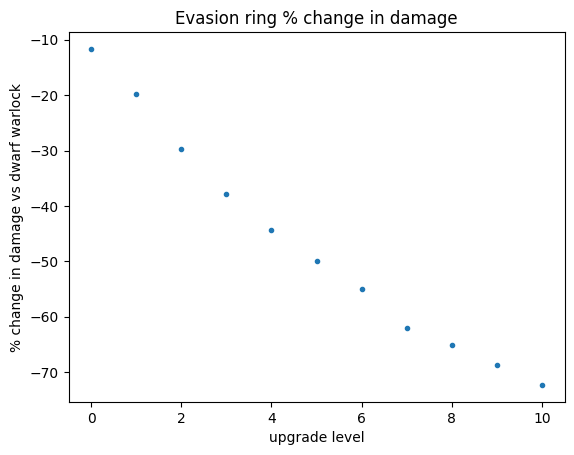

In [10]:
###########################Config variables###########################
creature = Creatures.warlock
armor1 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 18
total_levels=  10
num_simulations = 10000
extra_defenses = []
######################################################################

data = []
for i in range(-1, total_levels + 1):
    evasion_multiplier = 1.125 ** (1 + i)
    turns_data_points = simulate_damage_taken(creature.accuracy, creature.damage, armor1, hero_level, evasion_multiplier, num_simulations, extra_defenses)
    data.append(turns_data_points)

no_evasion_data = data[0]
evasion_data = data[1:]

no_evasion_avg = np.average(no_evasion_data)
evasion_avg = [np.average(x) for x in evasion_data]

evasion_improvement = [calc_percent_change(no_evasion_avg, x) for x in evasion_avg]

plt.title(f'Evasion ring % change in damage')
plt.xlabel('upgrade level')
plt.ylabel(f'% change in damage vs {creature.name}')
plt.plot(range(total_levels + 1), evasion_improvement, '.')



## Plot defense damage reduction

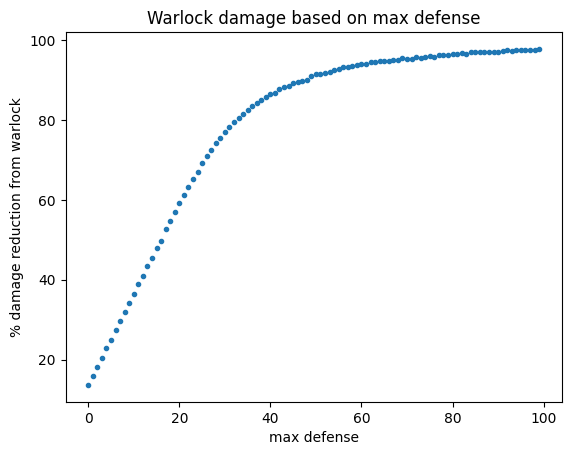

In [11]:
###########################Config variables###########################
damage_interval = Creatures.warlock.damage
num_simulations= 10000
num_plots = 100
bonus_defense = (0, 0)
######################################################################

average_damage = []

for max_defense in range(num_plots):
    turns_data_points = simulate_damage([(0, max_defense), bonus_defense], [damage_interval], 1.0, num_simulations)
    average_damage.append(-calc_percent_change(damage_interval[1], np.average(turns_data_points)))

plt.title("Warlock damage based on max defense")
plt.xlabel("max defense")
plt.ylabel("% damage reduction from warlock")
plt.plot(range(num_plots), average_damage, '.')

## Clover simulations

### Helper Functions

In [12]:
def calc_clover_proc_chance(level):
    return 0.25 * (level + 1)

def get_clover_damage(damage_ranges, clover_level):
    normal_damage = roll_ranges(damage_ranges)
    min_damage = sum([x[0] for x in damage_ranges])
    max_damage = sum([x[1] for x in damage_ranges])
    proc_chance = calc_clover_proc_chance(clover_level)
    return random.choices([normal_damage, min_damage, max_damage], weights=[1-proc_chance, 2/5 * proc_chance, 3/5 * proc_chance])[0]

def simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense):
    curr_hp = hp
    num_hits = 0
    while(curr_hp > 0):
        damage_roll = get_clover_damage((damage_range, (0, extra_strength)), clover_level)
        (defense_low, defense_high) = defense_range
        defense_roll = 0 if ignore_defense else triangular_discrete(defense_low, defense_high)
        curr_hp -= calc_final_damage(damage_roll, defense_roll)
        num_hits += 1
    return num_hits

def simulate_n_fights(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense, num_simulations):
    result = []
    for _ in range(num_simulations):
        num_hits = simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense)
        result.append(num_hits)
    return result

def simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, ignore_defense):
    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, -1, ignore_defense, num_simulations)

    avg_normal = np.average(data_points_normal)
    avg0 = np.average(data_points_clover0)
    avg1 = np.average(data_points_clover1)
    avg2 = np.average(data_points_clover2)
    avg3 = np.average(data_points_clover3)

    var_normal = np.var(data_points_normal)
    var0 = np.var(data_points_clover0)
    var1 = np.var(data_points_clover1)
    var2 = np.var(data_points_clover2)
    var3 = np.var(data_points_clover3)
    
    
    print(f'Num simulations: {num_simulations}')
    print('Average number of hits')
    print(f'Normal {avg_normal}')
    print(f'Clover +0 {avg0}')
    print(f'Clover +1 {avg1}')
    print(f'Clover +2 {avg2}')
    print(f'Clover +3 {avg3}')
    print(f'Variance:')
    print(f'Normal {var_normal}')
    print(f'Clover +0 {var0}')
    print(f'Clover +1 {var1}')
    print(f'Clover +2 {var2}')
    print(f'Clover +3 {var3}')
    print(f'% change:')
    print(f'Clover +0 {calc_percent_change(avg_normal, avg0)}')
    print(f'Clover +1 {calc_percent_change(avg_normal, avg1)}')
    print(f'Clover +2 {calc_percent_change(avg_normal, avg2)}')
    print(f'Clover +3 {calc_percent_change(avg_normal, avg3)}')
    

### Simulate clover efficacy

In [13]:
###########################Config variables###########################
weapon = WeaponInstance(Weapons.shortsword, 1, WeaponAugment.NONE)
damage_range = calc_damage_interval(weapon, False)
extra_strength = 3
enemy = Creatures.tengu
num_simulations = 5000
ignore_defense = False
#######################################################################
simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, False)

Num simulations: 5000
Average number of hits
Normal 26.793
Clover +0 25.6842
Clover +1 24.6076
Clover +2 23.5522
Clover +3 22.6812
Variance:
Normal 3.974151
Clover +0 7.684870360000001
Clover +1 10.46002224
Clover +2 12.006475160000003
Clover +3 13.149166560000001
% change:
Clover +0 -4.138394356734963
Clover +1 -8.156608069271817
Clover +2 -12.095696637181353
Clover +3 -15.346545739558836


### Clover Average improvement and Variance based on upgrade level

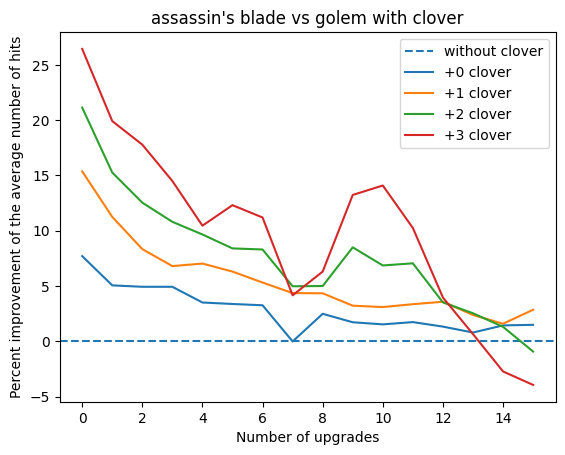

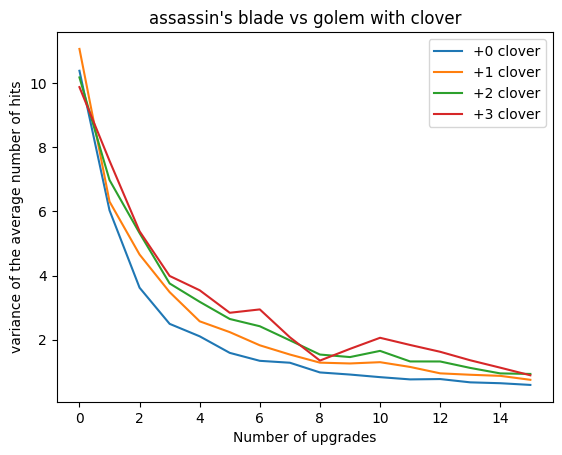

In [14]:
###########################Config variables###########################
enemy = Creatures.golem
weapon = WeaponInstance(Weapons.assassins_blade, 0, WeaponAugment.NONE)
num_simulations = 2000
num_upgrades = 15
ignore_defense = False
#######################################################################

averages_clover0 = []
averages_clover1 = []
averages_clover2 = []
averages_clover3 = []
vars_clover0 = []
vars_clover1 = []
vars_clover2 = []
vars_clover3 = []

for i in range(num_upgrades + 1):
    weapon.upgrade = i
    damage_range = calc_damage_interval(weapon, False)

    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, -1, ignore_defense, num_simulations)

    average_clover0 = np.average(data_points_clover0)
    average_clover1 = np.average(data_points_clover1)
    average_clover2 = np.average(data_points_clover2)
    average_clover3 = np.average(data_points_clover3)
    average_normal = np.average(data_points_normal)

    var_clover0 = np.var(data_points_clover0)
    var_clover1 = np.var(data_points_clover1)
    var_clover2 = np.var(data_points_clover2)
    var_clover3 = np.var(data_points_clover3)
    var_normal = np.var(data_points_normal)

    averages_clover0.append(-calc_percent_change(average_normal, average_clover0))
    averages_clover1.append(-calc_percent_change(average_normal, average_clover1))
    averages_clover2.append(-calc_percent_change(average_normal, average_clover2))
    averages_clover3.append(-calc_percent_change(average_normal, average_clover3))

    vars_clover0.append(var_clover0)
    vars_clover1.append(var_clover1)
    vars_clover2.append(var_clover2)
    vars_clover3.append(var_clover3)

augment_text = ''
if(weapon.augment == WeaponAugment.DAMAGE):
    augment_text = ' (damage)'
elif(weapon.augment == WeaponAugment.SPEED):
    augment_text = ' (speed)'

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("Percent improvement of the average number of hits")
plt.axhline(y=0, linestyle='--', label='without clover')
plt.plot(range(num_upgrades + 1), averages_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), averages_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), averages_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), averages_clover3, label='+3 clover')
plt.legend()
plt.show()

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("variance of the average number of hits")

plt.plot(range(num_upgrades + 1), vars_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), vars_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), vars_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), vars_clover3, label='+3 clover')
plt.legend()
plt.show()




## Equipment upgrade comparisons

In [ ]:

t1 = [
    WeaponInstance(Weapons.worn_shortsword),
    WeaponInstance(Weapons.staff),
    WeaponInstance(Weapons.dagger),
    WeaponInstance(Weapons.studded_gloves),
    WeaponInstance(Weapons.rapier),
    WeaponInstance(Weapons.cudgel),
]

t2 = [
    WeaponInstance(Weapons.sickle),
    WeaponInstance(Weapons.dirk),
    WeaponInstance(Weapons.shortsword),
    WeaponInstance(Weapons.handaxe),
    WeaponInstance(Weapons.quarterstaff),
    WeaponInstance(Weapons.spear)
]

t3 = [WeaponInstance(Weapons.sword),
    WeaponInstance(Weapons.mace),
    WeaponInstance(Weapons.scimitar),
    WeaponInstance(Weapons.sai),
    WeaponInstance(Weapons.round_shield),
    WeaponInstance(Weapons.whip)
]

t4 = [
    WeaponInstance(Weapons.longsword),
    WeaponInstance(Weapons.battleaxe),
    WeaponInstance(Weapons.runic_blade),
    WeaponInstance(Weapons.crossbow),
    WeaponInstance(Weapons.katana),
    WeaponInstance(Weapons.flail),
    WeaponInstance(Weapons.assassins_blade),
]

t5 = [
    WeaponInstance(Weapons.greatsword),
    WeaponInstance(Weapons.warhammer),
    WeaponInstance(Weapons.glaive),
    WeaponInstance(Weapons.greatshield),
    WeaponInstance(Weapons.stone_gauntlet),
    WeaponInstance(Weapons.war_scythe)
]


def get_hero_accuracy(hero: Hero):
    return hero.level + 9

def get_hero_evasion(hero: Hero):
    return hero.level + 4

def get_hero_max_hp(hero: Hero):
    return hero.level * 5 + 15

def simulate_encounter(hero: Hero,
                       enemy: CreatureInstance,
                       turns_to_surprise_attack: float = 0.0,
                       hero_first: bool = True,
                       turn_limit: float = math.inf,
                       debug: bool = False,
                       pre_melee: Callable[[Hero, CreatureInstance], int] = lambda hero, enemy: 0
                       ) -> int:
    hp_threshold = 1000
    num_retaliations = pre_melee(hero, enemy)
    surprise_end = turns_to_surprise_attack - 1.0
    if not hero_first:
        # set the enemy turn back 1 turn so it has 1 extra whole turn. Assumes last action the hero did took 1 whole turn
        enemy.turn -= 1
    
    while enemy.damage_taken < enemy.creature.hp\
        and hero.damage_taken < hp_threshold\
        and (hero.turn < turn_limit or enemy.turn < turn_limit):
        # check the turn. Prioritize the hero if equal
        if hero.turn <= enemy.turn:
            hero_attacks_enemy(hero, enemy, hero.turn <= surprise_end, debug=debug)
        else:
            num_retaliations += 1
            enemy_attacks_hero(hero, enemy, debug=debug)
    
    if enemy.creature is Creatures.skeleton:
        hero.take_damage(roll_skeleton_explosion_damage_taken(hero.get_defense_intervals()))
    return num_retaliations
    
def reset_hero(hero: Hero):
    hero.damage_taken = 0
    hero.turn = hero.turn % -1

def simulate_n_encounters(
        hero: Hero,
        enemy: Creature,
        num_simulations: int,
        turns_to_surprise_attack: float = 0.0,
        hero_first: bool = True,
        champion: ChampionVariant = ChampionVariant.NONE,
        pre_melee: Callable[[Hero, CreatureInstance], int] = lambda hero, enemy: 0
    ):
    turns_data_points = []
    damage_taken_data_points = []
    num_retaliations = []
    for _ in range(num_simulations):
        # this is either 0 or a negative number
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy, champion=champion)
        retaliations = simulate_encounter(hero, enemy_instance, turns_to_surprise_attack, hero_first, pre_melee=pre_melee)
        # we subtract extra turn to cancel out the extra turn we got from a previous fight so it doesn't get counted twice
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        num_retaliations.append(retaliations)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points, num_retaliations)

def simulate_n_encounters_in_list(hero: Hero, enemy_deck: list[Creature], num_simulations: int, turns_to_surprise_attack: float = 0.0, hero_first: bool = True):
    turns_data_points = []
    damage_taken_data_points = []
    num_retaliations = []
    deck = []
    for _ in range(num_simulations):
        if len(deck) == 0:
            deck = enemy_deck[:]
            random.shuffle(deck)
        # this is either 0 or a negative number
        enemy = deck.pop()
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy)
        retaliations = simulate_encounter(hero, enemy_instance, turns_to_surprise_attack, hero_first)
        # we subtract extra turn to cancel out the extra turn we got from a previous fight so it doesn't get counted twice
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        num_retaliations.append(retaliations)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points, num_retaliations)

def simulate_encounters_until_hp_threshold(hero: Hero, enemy: Creature, hp_threshold: int, turns_to_surprise_attack: float = 0.0, hero_first: bool = True):
    num_enemies_killed = 0
    hero_is_dead = False
    while hero.get_ht() - hero.damage_taken > hp_threshold:
        enemy_instance = CreatureInstance(enemy)
        simulate_encounter(hero, enemy_instance, turns_to_surprise_attack, hero_first)
        num_enemies_killed += 1
        # carry over turns for next encounter, but don't reset hp
        hero.turn = hero.turn % -1
    if hero.get_ht() - hero.damage_taken < 0:
        num_enemies_killed -= 1
        hero_is_dead = True
    return num_enemies_killed, hero_is_dead

def simulate_n_encounters_until_hp_threshold(hero: Hero, enemy: Creature, hp_threshold: int, num_simulations: int, turns_to_surprise_attack: float = 0.0, hero_first: bool = True):
    enemies_killed_data = []
    num_deaths = 0
    for _ in range(num_simulations):
        enemies_killed, hero_is_dead = simulate_encounters_until_hp_threshold(hero, enemy, hp_threshold, turns_to_surprise_attack, hero_first)
        enemies_killed_data.append(enemies_killed)
        num_deaths += 1 if hero_is_dead else 0
        reset_hero(hero)
        hero.turn = 0
    return enemies_killed_data, num_deaths

### Weapon comparisons

In [ ]:
###########################Config variables###########################
enemy = create_piranha(1)
champion_variant = ChampionVariant.NONE
weapons = t1
hero_level = 2
strength = 10
armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)
num_simulations = 5000
num_upgrades: tuple[int, int] = (0,2)

turns_to_surprise_attack = 0.0
hero_first = True

# # amount of damage taken past this threshold
# hp_threshold = 8
#########################################################################

def pre_melee(hero: Hero, enemy: CreatureInstance) -> int:
    return 0

num_turns_data = []
damage_taken_data = []
num_retaliations_data = []

for weapon in weapons:
    num_turns_results = []
    damage_taken_results = []
    num_retaliations_result = []
    hero = Hero(hero_level, strength, armor, weapon)
    for i in range(num_upgrades[0], num_upgrades[1] + 1):
        hero.weapon.upgrade = i
        turns_data_points, damage_taken_data_points, num_retaliations_points = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first, champion_variant, pre_melee)
        num_turns_results.append(turns_data_points)
        damage_taken_results.append(damage_taken_data_points)
        num_retaliations_result.append(num_retaliations_points)
    num_turns_data.append(num_turns_results)
    damage_taken_data.append(damage_taken_results)
    num_retaliations_data.append(num_retaliations_result)


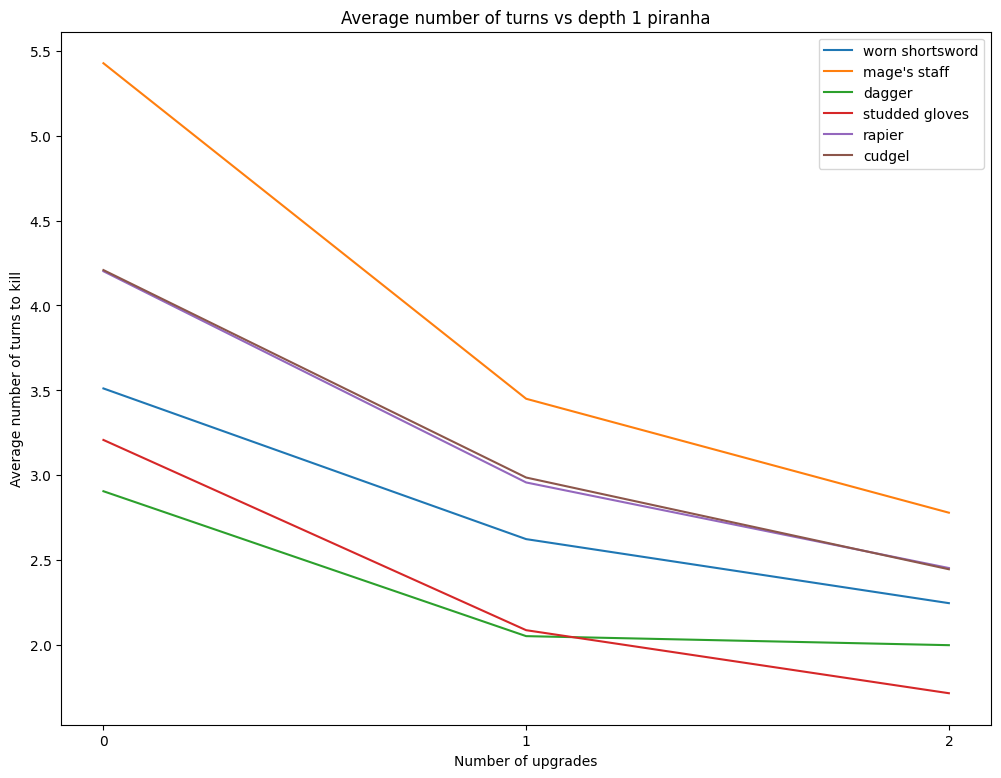

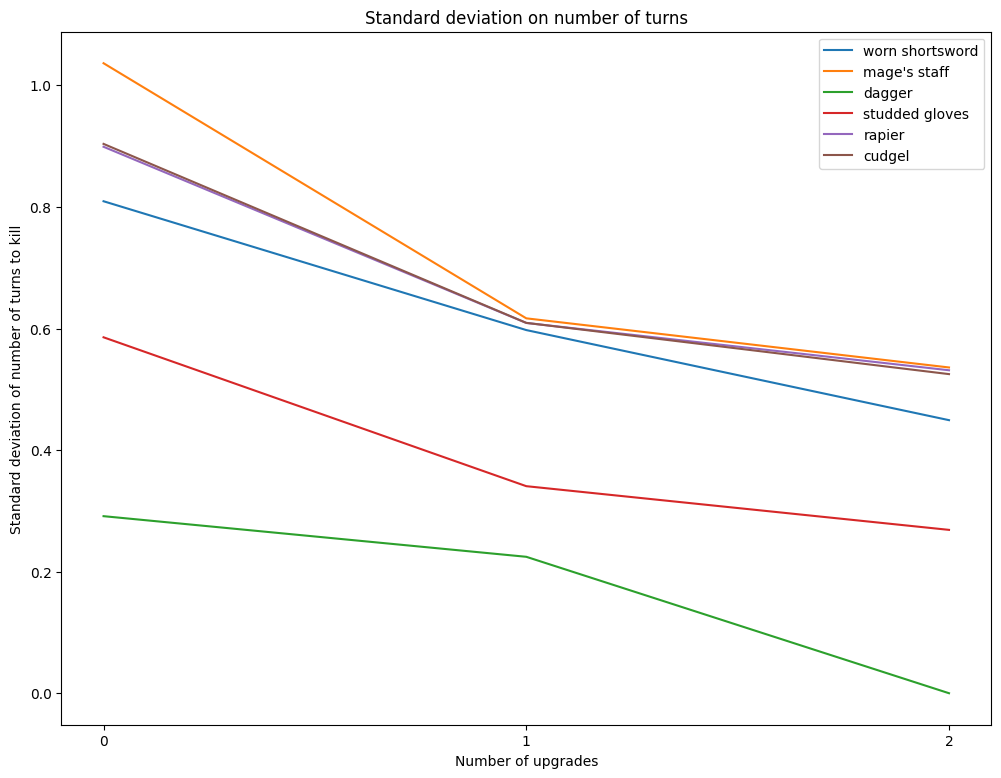

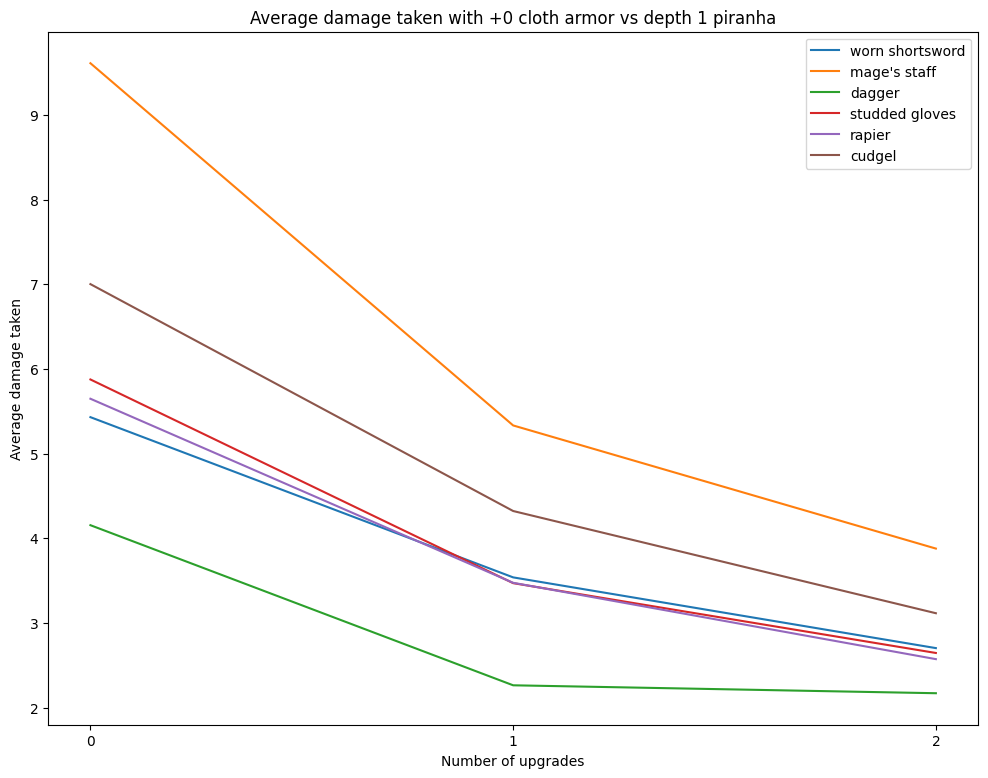

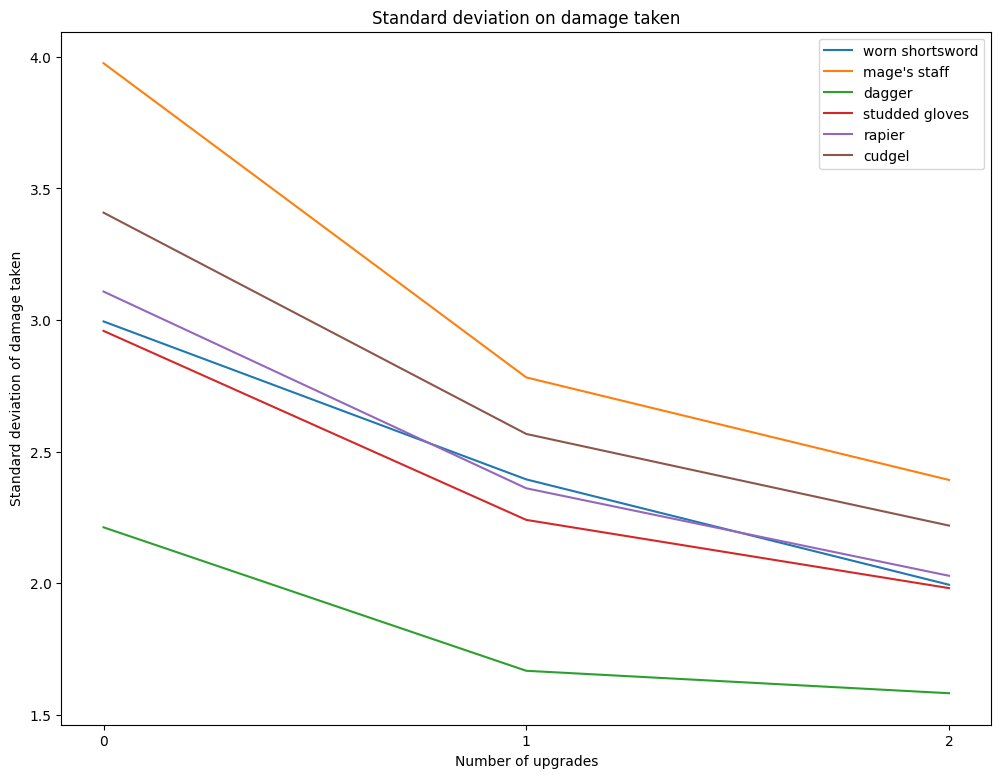

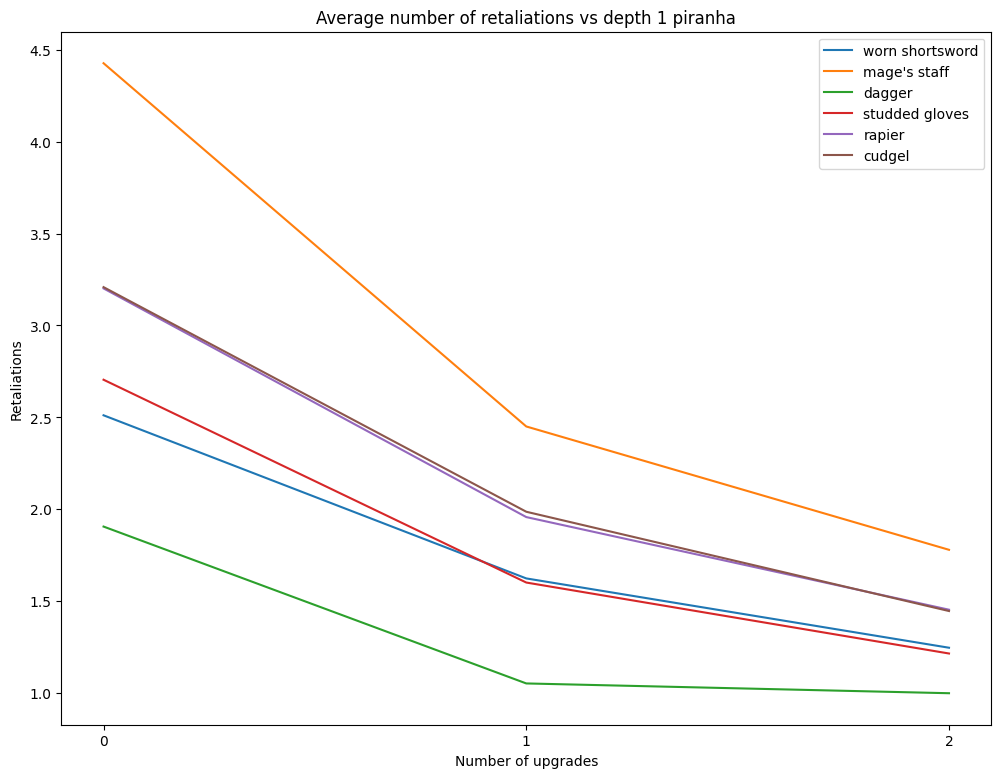

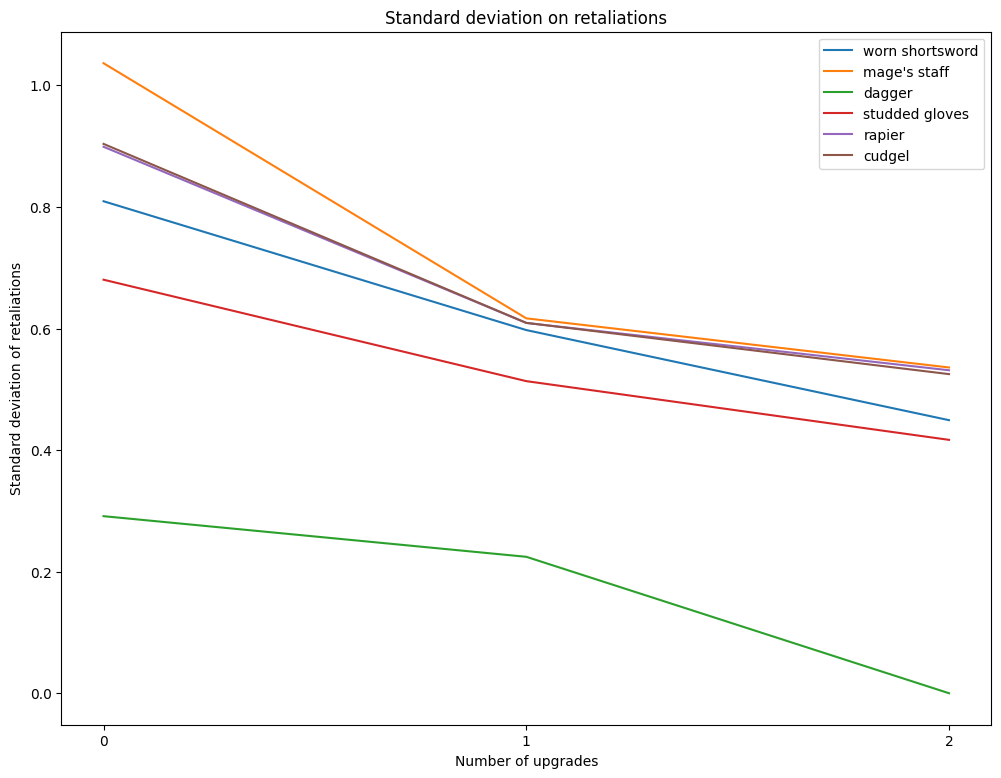

In [85]:
suffix = f' ({champion_variant})' if champion_variant != ChampionVariant.NONE else ''
enemy_name = f'{enemy.name}{suffix}'

plt.figure(figsize=(12,9))
plt.title(f'Average number of turns vs {enemy_name}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Standard deviation on number of turns')
plt.xlabel("Number of upgrades")
plt.ylabel("Standard deviation of number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.std(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Average damage taken with {armor.get_full_name()} vs {enemy_name}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average damage taken")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Standard deviation on damage taken')
plt.xlabel("Number of upgrades")
plt.ylabel("Standard deviation of damage taken")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.std(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Average number of retaliations vs {enemy_name}')
plt.xlabel("Number of upgrades")
plt.ylabel("Retaliations")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in num_retaliations_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Standard deviation on retaliations')
plt.xlabel("Number of upgrades")
plt.ylabel("Standard deviation of retaliations")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.std(x) for x in num_retaliations_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

# plt.figure(figsize=(12,9))
# plt.title(f'Probability of encounters exceeding {hp_threshold}')
# plt.xlabel("Number of upgrades")
# plt.ylabel("Probability of exceeding hp threshold")
# for i in range(len(weapons)):
#     plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [sum([1 if y >= hp_threshold else 0 for y in x]) / num_simulations for x in num_retaliations_data[i]], label=weapons[i].get_name_and_aug())
# plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
# plt.legend()
# plt.show()

### Upgrade priority

In [18]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 17
strength = 12
weapon = WeaponInstance(Weapons.worn_shortsword, 1)
armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)
num_simulations = 1000

turns_to_surprise_attack = 0.0
hero_first = True
omit_last_hit = False
#########################################################################

hero = Hero(hero_level, strength, armor, weapon)

print(f'Enemy: {enemy.name}')
print(f'Current gear: {hero.weapon.get_full_name()} and {hero.armor.get_full_name()}')

num_turns_data, damage_taken_data, _ = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
avg_damage_taken = np.average(damage_taken_data)
var_damage_taken = np.var(damage_taken_data)

print(f'Current gear average damage taken: {avg_damage_taken}')
print(f'Current gear variance damage taken: {var_damage_taken}')

hero.armor.upgrade += 1
up_armor_num_turns_data, up_armor_damage_taken_data, _ = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
up_armor_avg_damage_taken = np.average(up_armor_damage_taken_data)
up_armor_var_damage_taken = np.var(up_armor_damage_taken_data)

print(f'Upgrade armor average damage taken: {up_armor_avg_damage_taken}')
print(f'Upgrade armor variance damage taken: {up_armor_var_damage_taken}')

hero.armor.upgrade -= 1
hero.weapon.upgrade += 1
up_weapon_num_turns_data, up_weapon_damage_taken_data, _ = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
up_weapon_avg_damage_taken = np.average(up_weapon_damage_taken_data)
up_weapon_var_damage_taken = np.var(up_weapon_damage_taken_data)

print(f'Upgrade weapon average damage taken: {up_weapon_avg_damage_taken}')
print(f'Upgrade weapon variance damage taken: {up_weapon_var_damage_taken}')

improvement = calc_percent_change(up_weapon_avg_damage_taken, up_armor_avg_damage_taken) if up_weapon_avg_damage_taken < up_armor_avg_damage_taken else calc_percent_change(up_armor_avg_damage_taken, up_weapon_avg_damage_taken)

print(f'Upgrading {"weapon" if up_weapon_avg_damage_taken < up_armor_avg_damage_taken else "armor"} is better by {improvement}%')


Enemy: skeleton
Current gear: +1 worn shortsword and +0 cloth armor
Current gear average damage taken: 13.867
Current gear variance damage taken: 39.39531099999999
Upgrade armor average damage taken: 12.014
Upgrade armor variance damage taken: 31.481803999999997
Upgrade weapon average damage taken: 12.017
Upgrade weapon variance damage taken: 28.032711
Upgrading armor is better by 0.02497086732145925%


### Equipment set general comparison

In [36]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 7
strength = 12

###########################Equipment set 1###########################
weapon1 = WeaponInstance(Weapons.shortsword, 2)
armor1 = ArmorInstance(Armors.leather, 0, ArmorAugment.DEFENSE)
######################################################################

###########################Equipment set 2############################
weapon2 = WeaponInstance(Weapons.shortsword, 1)
armor2 = ArmorInstance(Armors.leather, 1, ArmorAugment.DEFENSE)
######################################################################

num_simulations = 10000

turns_to_surprise_attack = 1.0
hero_first = True
omit_last_hit = False
#########################################################################

hero1 = Hero(hero_level, strength, armor1, weapon1)

num_turns_data1, damage_taken_data1, _ = simulate_n_encounters(hero1, enemy, num_simulations, turns_to_surprise_attack, hero_first)
avg_damage_taken1 = np.average(damage_taken_data1)
var_damage_taken1 = np.var(damage_taken_data1)

print(f'Average damage taken for hero 1: {avg_damage_taken1}')

hero2 = Hero(hero_level, strength, armor2, weapon2)
num_turns_data2, damage_taken_data2, _ = simulate_n_encounters(hero2, enemy, num_simulations, turns_to_surprise_attack, hero_first)
avg_damage_taken2 = np.average(damage_taken_data2)
var_damage_taken2 = np.var(damage_taken_data2)

print(f'Average damage taken for hero 2: {avg_damage_taken2}')

print(f'Percent change of hero 2 from hero 1: {calc_percent_change(avg_damage_taken1, avg_damage_taken2)}% or hero1 from hero {calc_percent_change(avg_damage_taken2, avg_damage_taken1)}%')

Average damage taken for hero 1: 10.6283
Average damage taken for hero 2: 9.6513
Percent change of hero 2 from hero 1: -9.192439054223147% or hero1 from hero 10.122988612932957%


### Floor and weapon comparisons

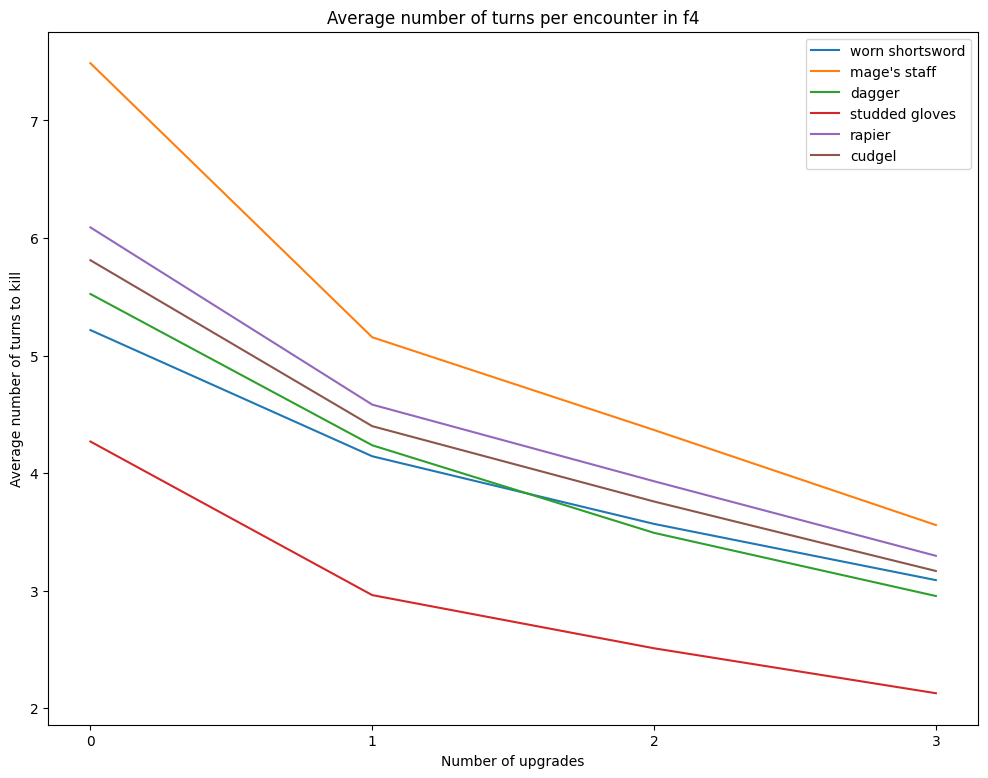

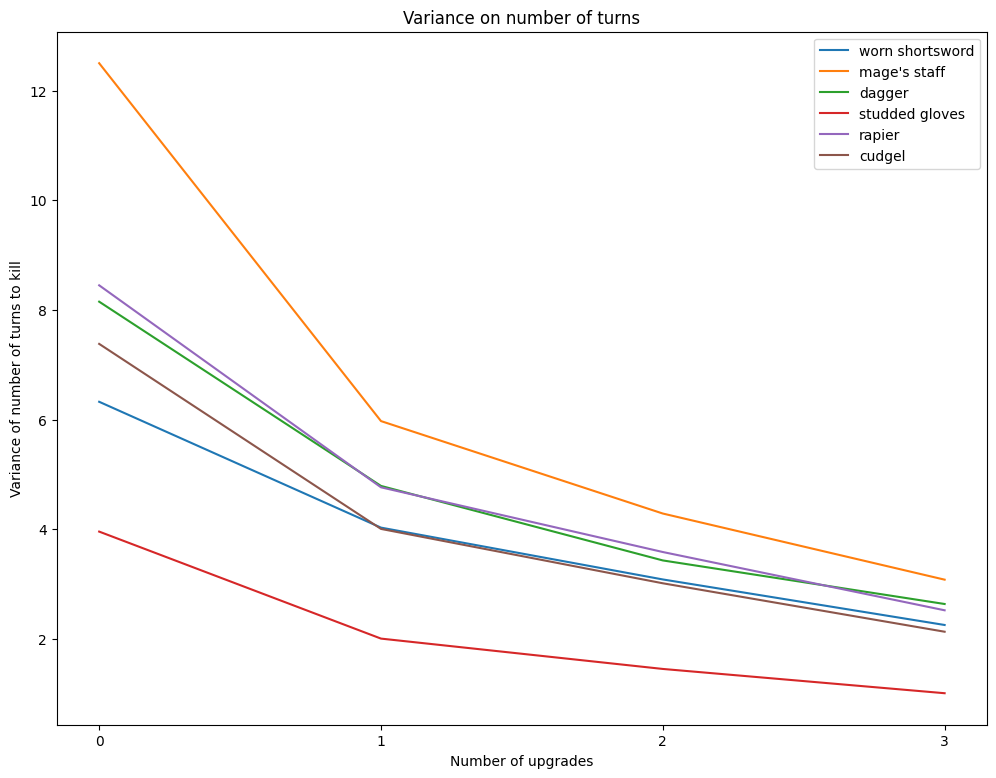

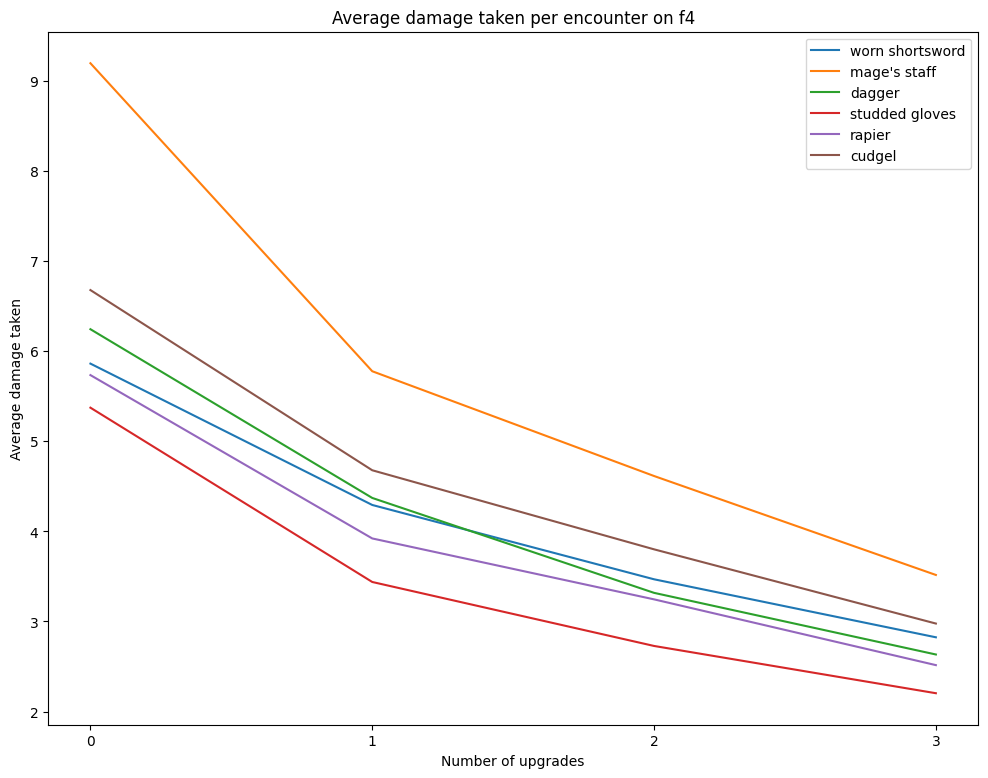

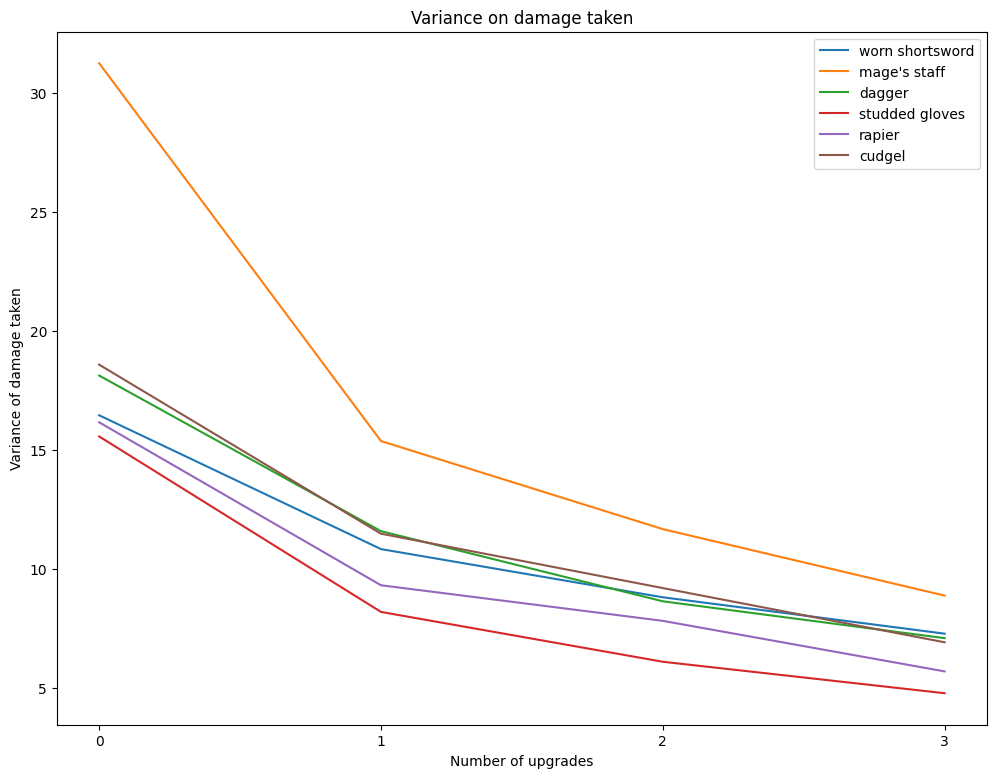

In [20]:
###########################Config variables###########################
floor = 'f4'
weapons = t1
hero_level = 5
strength = 12
armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)
num_simulations = 10000
num_upgrades: tuple[int, int] = (0,3)

turns_to_surprise_attack = 1.0
hero_first = True
#########################################################################

num_turns_data = []
damage_taken_data = []
num_retaliations_data = []

for weapon in weapons:
    num_turns_results = []
    damage_taken_results = []
    num_retaliations_result = []
    hero = Hero(hero_level, strength, armor, weapon)
    for i in range(num_upgrades[0], num_upgrades[1] + 1):
        hero.weapon.upgrade = i
        turns_data_points, damage_taken_data_points, num_retaliations_points = simulate_n_encounters_in_list(hero, floor_decks[floor], num_simulations, turns_to_surprise_attack, hero_first)
        num_turns_results.append(turns_data_points)
        damage_taken_results.append(damage_taken_data_points)
        num_retaliations_result.append(num_retaliations_points)
    num_turns_data.append(num_turns_results)
    damage_taken_data.append(damage_taken_results)
    num_retaliations_data.append(num_retaliations_result)

plt.figure(figsize=(12,9))
plt.title(f'Average number of turns per encounter in {floor}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Variance on number of turns')
plt.xlabel("Number of upgrades")
plt.ylabel("Variance of number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.var(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Average damage taken per encounter on {floor}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average damage taken")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Variance on damage taken')
plt.xlabel("Number of upgrades")
plt.ylabel("Variance of damage taken")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.var(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

# plt.figure(figsize=(12,9))
# plt.title(f'Average number of retaliations per encounter on {floor}')
# plt.xlabel("Number of upgrades")
# plt.ylabel("Retaliations")
# for i in range(len(weapons)):
#     plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in num_retaliations_data[i]], label=weapons[i].get_name_and_aug())
# plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
# plt.legend()
# plt.show()

# plt.figure(figsize=(12,9))
# plt.title('Variance on retaliations')
# plt.xlabel("Number of upgrades")
# plt.ylabel("Variance of retaliations")
# for i in range(len(weapons)):
#     plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.var(x) for x in num_retaliations_data[i]], label=weapons[i].get_name_and_aug())
# plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
# plt.legend()
# plt.show()

### Floor and equipment set comparison

In [21]:
###########################Config variables###########################
floor = 'f8'
hero_level = 9
strength = 13
num_simulations = 10000

turns_to_surprise_attack = 1.0
hero_first = True
#########################################################################
weapon1 = WeaponInstance(Weapons.sai, 1)
armor1 = ArmorInstance(Armors.leather, 1, ArmorAugment.DEFENSE)
#########################################################################
weapon2 = WeaponInstance(Weapons.sai, 1)
armor2 = ArmorInstance(Armors.mail, 1, ArmorAugment.NONE)
#########################################################################

hero1 = Hero(hero_level, strength, armor1, weapon1)
hero2 = Hero(hero_level, strength, armor2, weapon2)

turns_data_points1, damage_taken_data_points1, num_retaliations_points1 = simulate_n_encounters_in_list(hero1, floor_decks[floor], num_simulations, turns_to_surprise_attack, hero_first)
turns_data_points2, damage_taken_data_points2, num_retaliations_points2 = simulate_n_encounters_in_list(hero2, floor_decks[floor], num_simulations, turns_to_surprise_attack, hero_first)

print(f'Average damage per encounter on {floor}')
print(f'hero 1: {np.average(damage_taken_data_points1)}')
print(f'hero 2: {np.average(damage_taken_data_points2)}')


Average damage per encounter on f8
hero 1: 8.778
hero 2: 7.8035


## Guard pull simulation
The goal for this simulation is to determine what the best strategy is for when the guard pulls you. Should you run away, then find a pillar to continuously surprise attack it, or should you fight the guard while crippled, then find a pillar?

### Helper functions

In [22]:
def simulate_run_from_guard(hero: Hero, enemy: CreatureInstance, debug: bool = False):
    # pull + attack
    enemy_attacks_hero(hero, enemy, debug)
    # chase attack x 2
    enemy_attacks_hero(hero, enemy, debug)
    enemy_attacks_hero(hero, enemy, debug)

    # hero moved for 4 turns of cripple. Don't include pull attack as a turn
    hero.turn += 4
    enemy.turn = 4

    # surprise attack all the time
    simulate_encounter(hero, enemy, True, True, debug=debug)



def simulate_trade_blows(hero: Hero, enemy: CreatureInstance, debug: bool = False):
    # pull + attack    
    # guard and hero attacks each other no surprise for 4 turns
    simulate_encounter(hero, enemy, turns_to_surprise_attack=0, hero_first=False, turn_limit=4.0, debug = debug)

    # guard and hero attacks each other surprise
    simulate_encounter(hero, enemy, turns_to_surprise_attack=math.inf, hero_first=True, debug = debug)

def simulate_n_run_from_guard(hero: Hero, enemy: Creature, num_simulations: int):
    turns_data_points = []
    damage_taken_data_points = []
    hero.damage_taken = 0
    hero.turn = 0
    for _ in range(num_simulations):
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy)
        simulate_run_from_guard(hero, enemy_instance)
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points)

def simulate_n_trade_blows(hero: Hero, enemy: Creature, num_simulations: int):
    turns_data_points = []
    damage_taken_data_points = []
    hero.damage_taken = 0
    hero.turn = 0
    for _ in range(num_simulations):
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy)
        simulate_trade_blows(hero, enemy_instance)
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points)

### Simulation

In [23]:
###########################Config variables###########################
hero_level = 8
strength = 13
num_simulations = 10000

###########################Equipment set 1###########################
weapon = WeaponInstance(Weapons.shortsword, 1)
armor = ArmorInstance(Armors.mail, 1, ArmorAugment.DEFENSE)
######################################################################

enemy = Creatures.guard
hero = Hero(hero_level, strength, armor, weapon)

_, damage_taken_data_run = simulate_n_run_from_guard(hero, enemy, num_simulations)
_, damage_taken_data_fight = simulate_n_trade_blows(hero, enemy, num_simulations)

print(f'Enemy: {enemy.name}')
print(f'Hero is at level {hero_level} and has {strength} strength')
print(f'Current gear: {hero.weapon.get_full_name()} and {hero.armor.get_full_name()}')
print(f'"Run" strategy average damage taken: {np.average(damage_taken_data_run)}')
print(f'"Fight" strategy average damage taken: {np.average(damage_taken_data_fight)}')

Enemy: guard
Hero is at level 8 and has 13 strength
Current gear: +1 shortsword and +1 mail armor (defense)
"Run" strategy average damage taken: 29.8913
"Fight" strategy average damage taken: 20.3963


## Stone glyph

### Simple comparisons

In [24]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.worn_shortsword)
armor = ArmorInstance(Armors.mail, 3, ArmorAugment.EVASION)
num_attacks = 10000
######################################################################
hero = Hero(hero_level, 21, armor, weapon)

normal_damage_data = []
stone_damage_data = []


for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    normal_damage_data.append(hero.damage_taken)
    reset_hero(hero)

armor.isStone = True
for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    stone_damage_data.append(hero.damage_taken)
    reset_hero(hero)

no_stone_average = np.average(normal_damage_data)
stone_average = np.average(stone_damage_data)
print(f'Average damage taken per hit without stone: {no_stone_average}')
print(f'Average damage taken per hit with stone: {stone_average}')
print(f'% change of average damage taken per hit: {calc_percent_change(no_stone_average, stone_average)}')
print(f'Variance of damage taken per hit without stone: {np.var(normal_damage_data)}')
print(f'Variance of damage taken per hit with stone: {np.var(stone_damage_data)}')

Average damage taken per hit without stone: 6.7537
Average damage taken per hit with stone: 10.1859
% change of average damage taken per hit: 50.81955076476598
Variance of damage taken per hit without stone: 77.03883631000001
Variance of damage taken per hit with stone: 0.87074119


### Augmentation comparisons

In [25]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.shortsword)
armor = ArmorInstance(Armors.plate, 2, ArmorAugment.NONE, isStone=True)
num_attacks = 10000
evasion_ring_boost = 3
######################################################################
hero = Hero(hero_level, 21, armor, weapon, evasion_multiplier=evasion_ring_multiplier(evasion_ring_boost))

no_aug_data = []
defense_data = []
evasion_data = []

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    no_aug_data.append(hero.damage_taken)
    reset_hero(hero)

armor.augment = ArmorAugment.DEFENSE

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    defense_data.append(hero.damage_taken)
    reset_hero(hero)

armor.augment = ArmorAugment.EVASION

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    evasion_data.append(hero.damage_taken)
    reset_hero(hero)

print(f'Average damage taken per hit with stone no aug: {np.average(no_aug_data)}')
print(f'Average damage taken per hit with stone defense aug: {np.average(defense_data)}')
print(f'Average damage taken per hit with stone evasion aug: {np.average(evasion_data)}')

Average damage taken per hit with stone no aug: 8.5851
Average damage taken per hit with stone defense aug: 8.6755
Average damage taken per hit with stone evasion aug: 8.7487


### Evasion and Arcana

In [26]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.shortsword)
armor = ArmorInstance(Armors.mail, 3, ArmorAugment.EVASION)
num_attacks = 10000
# 0 if no ring. a +0 ring is 1
evasion_boost = 0
arcana_boost = 0
######################################################################
evasion_multiplier = 1.125 ** evasion_boost
arcana_multiplier = 1.175 ** arcana_boost
hero = Hero(hero_level, 21, armor, weapon, evasion_multiplier=evasion_multiplier, arcana_multiplier=arcana_multiplier)

normal_damage_data = []
boosted_damage_data = []

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    normal_damage_data.append(hero.damage_taken)
    reset_hero(hero)

hero.armor.isStone = True

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    boosted_damage_data.append(hero.damage_taken)
    reset_hero(hero)

regular_average_damage = np.average(normal_damage_data)
boosted_average_damage = np.average(boosted_damage_data)

print(f'Damage taken without stone: {np.average(regular_average_damage)}')
print(f'Damage taken with stone with arcana boost {arcana_boost} and evasion boost {evasion_boost}: {np.average(boosted_average_damage)}')

Damage taken without stone: 6.6843
Damage taken with stone with arcana boost 0 and evasion boost 0: 10.1842


### Normal armor vs stone boosted armor

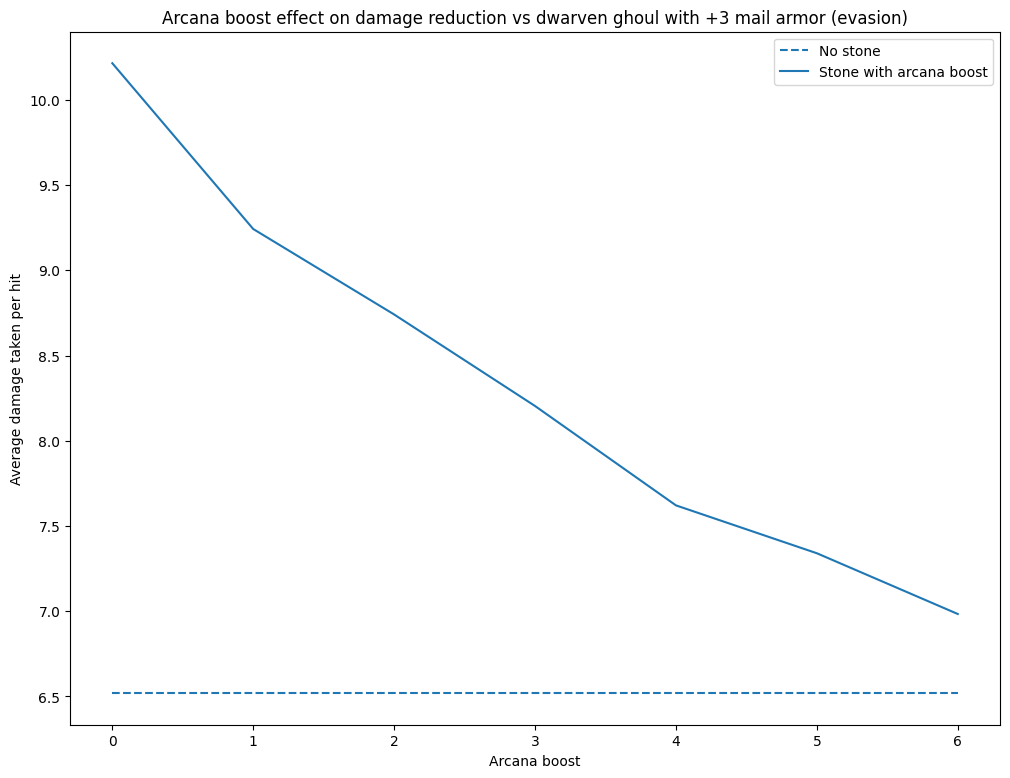

In [27]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.shortsword)
armor = ArmorInstance(Armors.mail, 3, ArmorAugment.EVASION)
arcana_boost_range = [0, 6]
num_attacks = 10000
# 0 if no ring. a +0 ring is 1
evasion_boost = 0
######################################################################
evasion_multiplier = 1.125 ** evasion_boost
arcana_multiplier = 1.175 ** arcana_boost
hero = Hero(hero_level, 21, armor, weapon, evasion_multiplier=evasion_multiplier)

normal_damage_data = []
boosted_damage_data_list = []

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    normal_damage_data.append(hero.damage_taken)
    reset_hero(hero)

hero.armor.isStone = True

for i in range(arcana_boost_range[0], arcana_boost_range[1] + 1):
    hero.arcana_multiplier = 1.175 ** i
    boosted_damage_data = []
    for _ in range(num_attacks):
        enemy_instance = CreatureInstance(enemy)
        enemy_attacks_hero(hero, enemy_instance)
        boosted_damage_data.append(hero.damage_taken)
        reset_hero(hero)
    boosted_damage_data_list.append(boosted_damage_data)

plt.figure(figsize=(12,9))
plt.title(f'Arcana boost effect on damage reduction vs {enemy.name} with {armor.get_full_name()}')
plt.xlabel("Arcana boost")
plt.ylabel("Average damage taken per hit")
plt.hlines(np.average(normal_damage_data), arcana_boost_range[0], arcana_boost_range[1], label='No stone', linestyles='dashed')
plt.plot(range(arcana_boost_range[0], arcana_boost_range[1] + 1), [np.average(x) for x in boosted_damage_data_list], label='Stone with arcana boost')
plt.xticks(range(arcana_boost_range[0], arcana_boost_range[1] + 1))
plt.legend()
plt.show()

## Accuracy and Furor ring comparisons

### Simple comparison

In [28]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 7
strength = 12
weapon = WeaponInstance(Weapons.shortsword)
accuracy_boost = 1
attack_speed_boost = 1
num_simulations = 5000
turns_to_surprise_attack = 0.0
hero_first = True
######################################################################
accuracy_multiplier = accuracy_ring_multiplier(accuracy_boost)
attack_speed_multiplier = furor_ring_multiplier(attack_speed_boost)

armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)

hero = Hero(hero_level, strength, armor, weapon)
accurate_hero = Hero(hero_level, strength, armor, weapon, accuracy_multiplier=accuracy_multiplier)
fast_hero = Hero(hero_level, strength, armor, weapon, attack_speed_multiplier=attack_speed_multiplier)

turns_data, damage_taken_data, num_retaliations = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
turns_data_accurate, damage_taken_data_accurate, num_retaliations_accurate = simulate_n_encounters(accurate_hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
turns_data_fast, damage_taken_data_fast, num_retaliations_fast = simulate_n_encounters(fast_hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)

print(f'Average number of retaliations: {np.average(num_retaliations)}')
print(f'Average number of retaliations for accurate: {np.average(num_retaliations_accurate)}')
print(f'Average number of retaliations for fast: {np.average(num_retaliations_fast)}')

Average number of retaliations: 5.5308
Average number of retaliations for accurate: 5.0036
Average number of retaliations for fast: 5.0476


### Upgrade comparisons

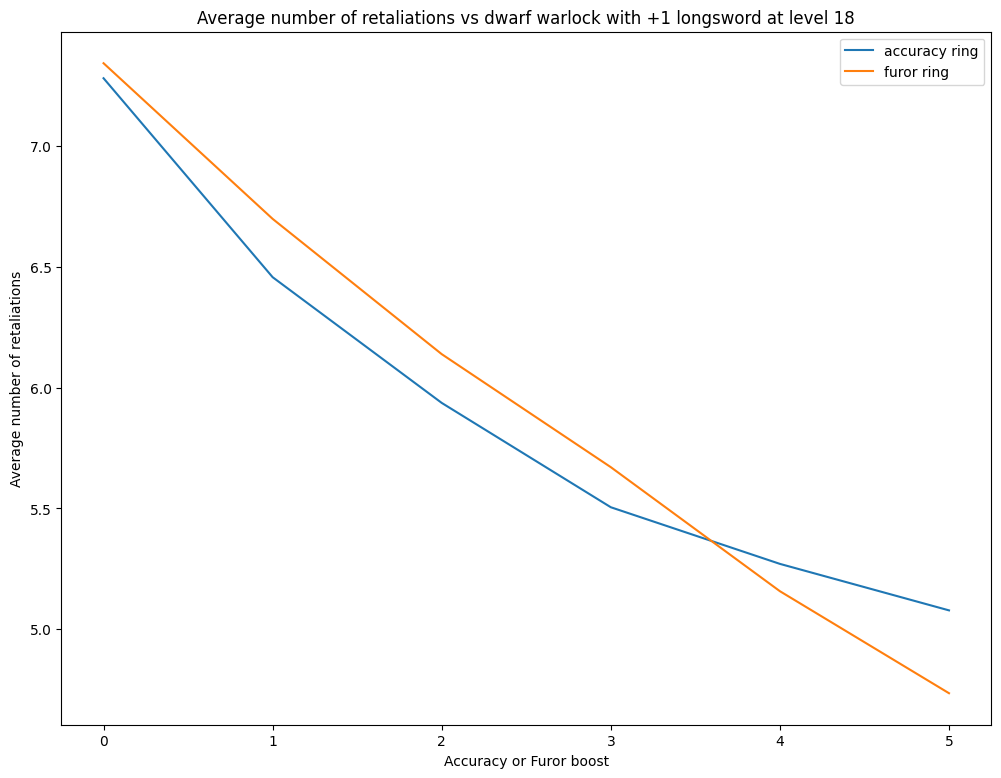

In [29]:
###########################Config variables###########################
enemy = Creatures.warlock
hero_level = 18
strength = 16
weapon = WeaponInstance(Weapons.longsword, 1)
boost_range = [0, 5]
num_simulations = 5000
hero_first = True
######################################################################

turns_to_surprise_attack = 0.0
armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)

accuracy_data = []
furor_data = []

for i in range(boost_range[0], boost_range[1] + 1):
    accuracy_multiplier = accuracy_ring_multiplier(i)
    attack_speed_multiplier = furor_ring_multiplier(i)

    accurate_hero = Hero(hero_level, strength, armor, weapon, accuracy_multiplier=accuracy_multiplier)
    fast_hero = Hero(hero_level, strength, armor, weapon, attack_speed_multiplier=attack_speed_multiplier)

    _,_,num_retaliations_accurate = simulate_n_encounters(accurate_hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
    _,_,num_retaliations_fast = simulate_n_encounters(fast_hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)

    accuracy_data.append(num_retaliations_accurate)
    furor_data.append(num_retaliations_fast)

plt.figure(figsize=(12,9))
plt.title(f'Average number of retaliations vs {enemy.name} with {weapon.get_full_name()} at level {hero_level}')
plt.xlabel("Accuracy or Furor boost")
plt.ylabel("Average number of retaliations")
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in accuracy_data], label='accuracy ring')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in furor_data], label='furor ring')
plt.xticks(range(boost_range[0], boost_range[1] + 1))
plt.legend()
plt.show()

### Upgrade priority accuracy

In [30]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
strength = 16
weapon = WeaponInstance(Weapons.longsword, 0)
boost = 1
num_upgrades = 15
num_simulations = 5000
hero_first = True
######################################################################

turns_to_surprise_attack = 0.0
armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)
######################################################################

print(f'Enemy: {enemy.name}')
boost_increase = 0
weapon_increase = 0

for _ in range(num_upgrades):
    # accuracy ring upgrade
    acc_multi = accuracy_ring_multiplier(boost + boost_increase + 1)
    weapon_copy = replace(weapon, upgrade=weapon.upgrade + weapon_increase)
    hero = Hero(hero_level, strength, armor, weapon_copy, accuracy_multiplier=acc_multi)
    _,_,num_retaliations_accuracy = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
    # weapon upgrade
    acc_multi = accuracy_ring_multiplier(boost + boost_increase)
    weapon_copy = replace(weapon, upgrade=weapon.upgrade + weapon_increase + 1)
    hero = Hero(hero_level, strength, armor, weapon_copy, accuracy_multiplier=acc_multi)
    _,_,num_retaliations_weapon = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)

    weapon_average = np.average(num_retaliations_weapon)
    ring_average = np.average(num_retaliations_accuracy)
    # print(f'Weapon: {weapon_average} Ring: {ring_average}')
    # less retaliations the better
    if weapon_average <= ring_average:
        print('upgrade weapon')
        weapon_increase += 1
    else:
        print('upgrade accuracy ring')
        boost_increase += 1

print(f'Allocate {boost_increase} upgrades into +{boost - 1} ring and {weapon_increase} upgrades into {weapon.get_full_name()}')


Enemy: dwarven ghoul
upgrade weapon
upgrade weapon
upgrade weapon
upgrade weapon
upgrade accuracy ring
upgrade weapon
upgrade weapon
upgrade weapon
upgrade accuracy ring
upgrade weapon
upgrade weapon
upgrade weapon
upgrade weapon
upgrade accuracy ring
upgrade weapon
Allocate 3 upgrades into +0 ring and 12 upgrades into +0 longsword


### ferret tuft improvements

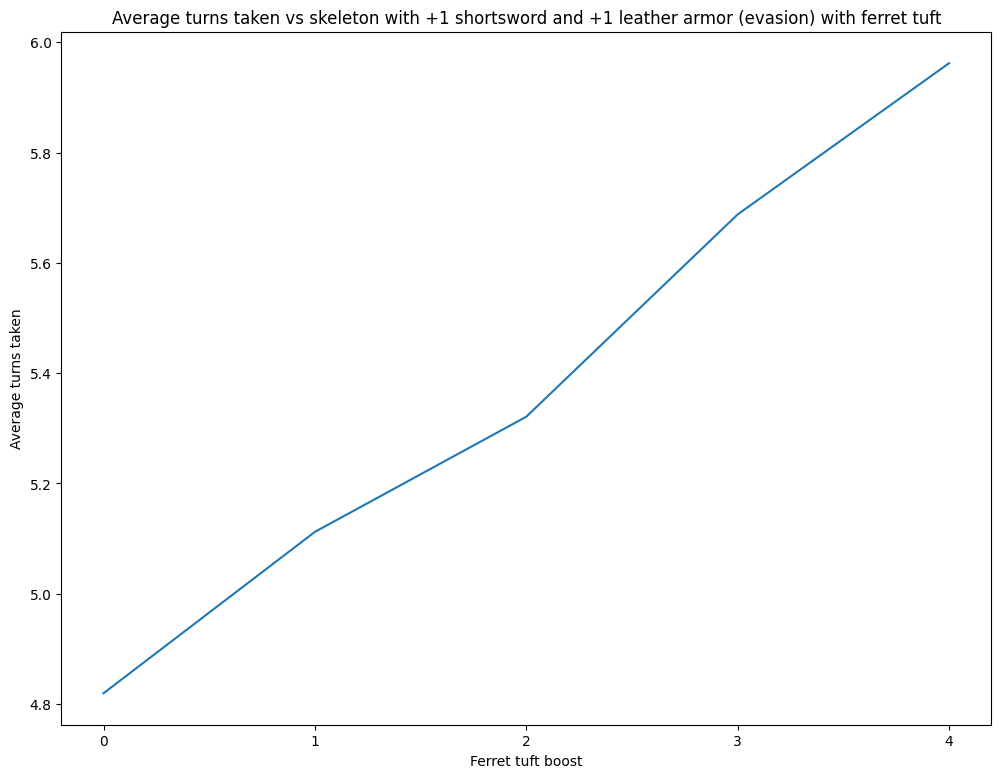

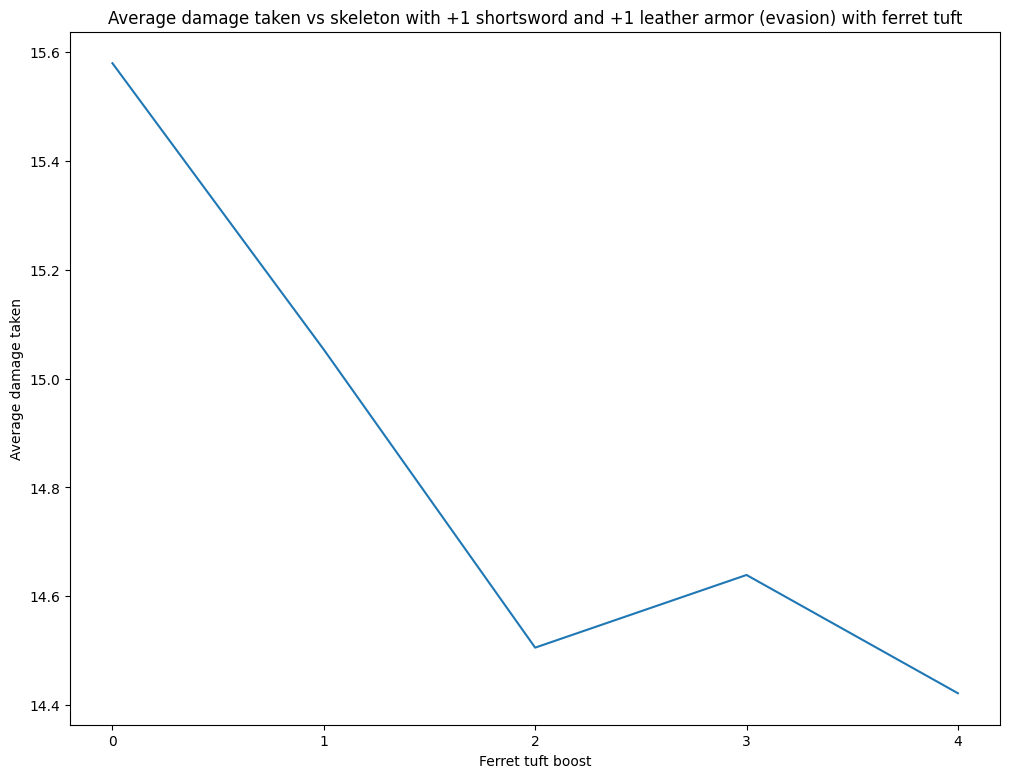

In [31]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 7
strength = 12
weapon = WeaponInstance(Weapons.shortsword, 1)
armor = ArmorInstance(Armors.leather, 1, ArmorAugment.EVASION)
num_simulations = 5000
hero_first = True
######################################################################
turns_to_surprise_attack = 0.0
######################################################################
trinket_num_boosts = 5

turns_data_whole = []
damage_taken_data_whole = []
num_retaliations_whole = []
for tuft_boost in range(0, trinket_num_boosts):
    hero = Hero(hero_level, strength, armor, weapon, ferret_tuft_boost=tuft_boost)
    turns_data, damage_taken_data, num_retaliations = simulate_n_encounters(hero, enemy, num_simulations, turns_to_surprise_attack, hero_first)
    turns_data_whole.append(turns_data)
    damage_taken_data_whole.append(damage_taken_data)
    num_retaliations_whole.append(num_retaliations)

plt.figure(figsize=(12,9))
plt.title(f'Average turns taken vs {enemy.name} with {weapon.get_full_name()} and {armor.get_full_name()} with ferret tuft')
plt.xlabel("Ferret tuft boost")
plt.ylabel("Average turns taken")
plt.plot(range(trinket_num_boosts), [np.average(x) for x in turns_data_whole])
plt.xticks(range(trinket_num_boosts))
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Average damage taken vs {enemy.name} with {weapon.get_full_name()} and {armor.get_full_name()} with ferret tuft')
plt.xlabel("Ferret tuft boost")
plt.ylabel("Average damage taken")
plt.plot(range(trinket_num_boosts), [np.average(x) for x in damage_taken_data_whole])
plt.xticks(range(trinket_num_boosts))
plt.show()


## Tenacity ring
Fight consecutive enemies until hp meets some threshold

### Simple test

In [32]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 7
strength = 12
hp_threshold = 20
boost = 1
weapon = WeaponInstance(Weapons.shortsword, 1)
armor = ArmorInstance(Armors.leather, 1, ArmorAugment.DEFENSE)
num_simulations = 10000
hero_first = True
######################################################################
turns_to_surprise_attack = 0.0
######################################################################
hero = Hero(hero_level, strength, armor, weapon)
num_enemies_killed, num_deaths = simulate_n_encounters_until_hp_threshold(hero, enemy, hp_threshold, num_simulations, turns_to_surprise_attack, hero_first)
hero_tenacity = Hero(hero_level, strength, armor, weapon, tenacity_boost=boost)
num_enemies_killed_tenacity, num_deaths_tenacity = simulate_n_encounters_until_hp_threshold(hero_tenacity, enemy, hp_threshold, num_simulations, turns_to_surprise_attack, hero_first)

print(f'Weapon: {weapon.get_full_name()}')
print(f'Armor: {armor.get_full_name()}')
print(f'Threshold: {hp_threshold} hp')

print(f'Enemies killed without tenacity: {np.average(num_enemies_killed)}')
print(f'Hero deaths without tenacity: {num_deaths} / {num_simulations}')
print(f'Enemies killed with +{boost - 1} tenacity: {np.average(num_enemies_killed_tenacity)}')
print(f'Hero deaths with +{boost - 1} tenacity: {num_deaths_tenacity} / {num_simulations}')

Weapon: +1 shortsword
Armor: +1 leather armor (defense)
Threshold: 20 hp
Enemies killed without tenacity: 3.4336
Hero deaths without tenacity: 249 / 10000
Enemies killed with +0 tenacity: 3.4621
Hero deaths with +0 tenacity: 200 / 10000


### Upgrade comparisons

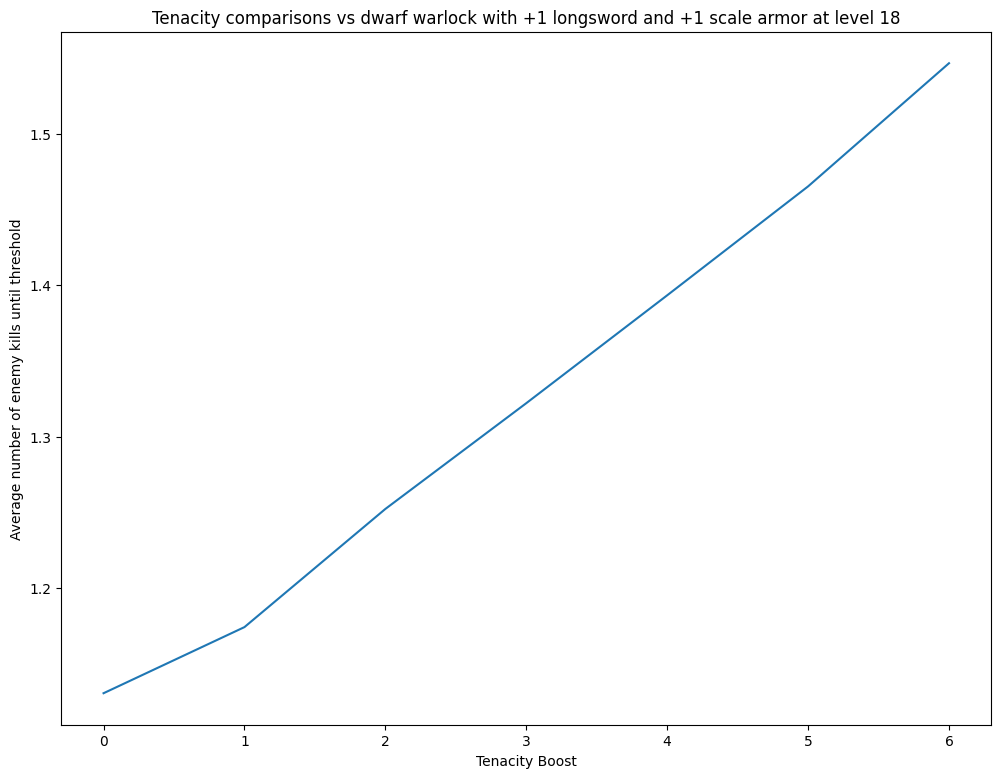

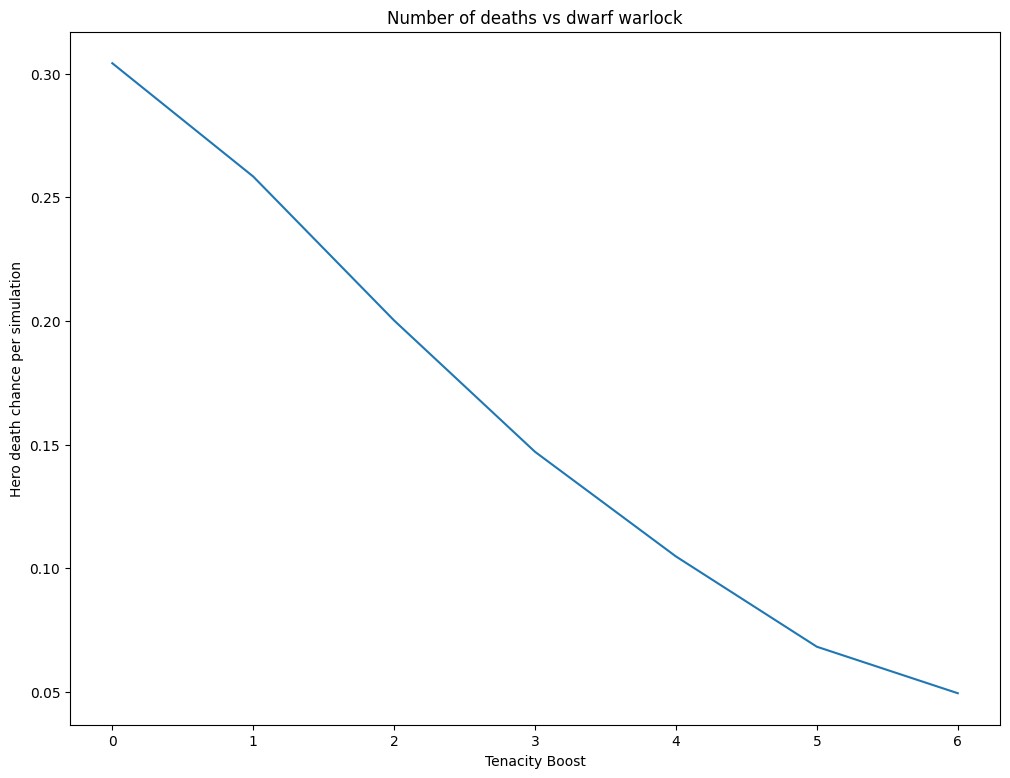

In [33]:
###########################Config variables###########################
enemy = Creatures.warlock
hero_level = 18
strength = 16
hp_threshold = 50
boost_range = [0, 6]
weapon = WeaponInstance(Weapons.longsword, 1)
armor = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
num_simulations = 10000
hero_first = True
######################################################################
turns_to_surprise_attack = 0.0
######################################################################

enemies_killed_per_boost = []
num_deaths_per_boost = []

for boost in range(boost_range[0], boost_range[1] + 1):
    hero = Hero(hero_level, strength, armor, weapon, tenacity_boost=boost)
    num_enemies_killed, num_deaths = simulate_n_encounters_until_hp_threshold(hero, enemy, hp_threshold, num_simulations, turns_to_surprise_attack, hero_first)
    enemies_killed_per_boost.append(num_enemies_killed)
    num_deaths_per_boost.append(num_deaths)

plt.figure(figsize=(12,9))
plt.title(f'Tenacity comparisons vs {enemy.name} with {weapon.get_full_name()} and {armor.get_full_name()} at level {hero_level}')
plt.xlabel("Tenacity Boost")
plt.ylabel("Average number of enemy kills until threshold")
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in enemies_killed_per_boost])
plt.xticks(range(boost_range[0], boost_range[1] + 1))
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Number of deaths vs {enemy.name}')
plt.xlabel("Tenacity Boost")
plt.ylabel("Hero death chance per simulation")
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x)/num_simulations for x in num_deaths_per_boost])
plt.xticks(range(boost_range[0], boost_range[1] + 1))
plt.show()

### Comparison with other rings

In [34]:
###########################Config variables###########################
enemy = Creatures.warlock
hero_level = 18
strength = 16
hp_threshold = 30
boost_range = [0, 6]
weapon = WeaponInstance(Weapons.longsword, 5)
armor = ArmorInstance(Armors.scale, 1, ArmorAugment.EVASION)
num_simulations = 5000
hero_first = True
######################################################################
turns_to_surprise_attack = 0.0
######################################################################

enemies_killed_per_boost_tenacity = []
num_deaths_per_boost_tenacity = []

for boost in range(boost_range[0], boost_range[1] + 1):
    hero = Hero(hero_level, strength, armor, weapon, tenacity_boost=boost)
    num_enemies_killed, num_deaths = simulate_n_encounters_until_hp_threshold(hero, enemy, hp_threshold, num_simulations, turns_to_surprise_attack, hero_first)
    enemies_killed_per_boost_tenacity.append(num_enemies_killed)
    num_deaths_per_boost_tenacity.append(num_deaths)

enemies_killed_per_boost_accuracy = []
num_deaths_per_boost_accuracy = []

for boost in range(boost_range[0], boost_range[1] + 1):
    hero = Hero(hero_level, strength, armor, weapon, accuracy_multiplier=accuracy_ring_multiplier(boost))
    num_enemies_killed, num_deaths = simulate_n_encounters_until_hp_threshold(hero, enemy, hp_threshold, num_simulations, turns_to_surprise_attack, hero_first)
    enemies_killed_per_boost_accuracy.append(num_enemies_killed)
    num_deaths_per_boost_accuracy.append(num_deaths)

enemies_killed_per_boost_furor = []
num_deaths_per_boost_furor = []

for boost in range(boost_range[0], boost_range[1] + 1):
    hero = Hero(hero_level, strength, armor, weapon, attack_speed_multiplier=furor_ring_multiplier(boost))
    num_enemies_killed, num_deaths = simulate_n_encounters_until_hp_threshold(hero, enemy, hp_threshold, num_simulations, turns_to_surprise_attack, hero_first)
    enemies_killed_per_boost_furor.append(num_enemies_killed)
    num_deaths_per_boost_furor.append(num_deaths)

enemies_killed_per_boost_evasion = []
num_deaths_per_boost_evasion = []

for boost in range(boost_range[0], boost_range[1] + 1):
    hero = Hero(hero_level, strength, armor, weapon, evasion_multiplier=evasion_ring_multiplier(boost))
    num_enemies_killed, num_deaths = simulate_n_encounters_until_hp_threshold(hero, enemy, hp_threshold, num_simulations, turns_to_surprise_attack, hero_first)
    enemies_killed_per_boost_evasion.append(num_enemies_killed)
    num_deaths_per_boost_evasion.append(num_deaths)

plt.figure(figsize=(12,9))
plt.title(f'Tenacity comparisons vs {enemy.name} with {weapon.get_full_name()} and {armor.get_full_name()} at level {hero_level}')
plt.xlabel("Boost")
plt.ylabel("Average number of enemy kills until threshold")
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in enemies_killed_per_boost_tenacity], label='tenacity')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in enemies_killed_per_boost_accuracy], label = 'accuracy')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in enemies_killed_per_boost_furor], label = 'furor')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in enemies_killed_per_boost_evasion], label = 'evasion')
plt.xticks(range(boost_range[0], boost_range[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Number of deaths vs {enemy.name}')
plt.xlabel("Tenacity Boost")
plt.ylabel("Hero death chance per simulation")
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x)/num_simulations for x in num_deaths_per_boost_tenacity], label='tenacity')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x)/num_simulations for x in num_deaths_per_boost_accuracy], label='accuracy')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x)/num_simulations for x in num_deaths_per_boost_furor], label='furor')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x)/num_simulations for x in num_deaths_per_boost_evasion], label='evasion')
plt.xticks(range(boost_range[0], boost_range[1] + 1))
plt.legend()
plt.show()

KeyboardInterrupt: 

# Huntress bow test

In [ ]:
def construct_bow(hero_level: int, augment: WeaponAugment = WeaponAugment.NONE):
    min = 1 + hero_level // 5
    max = 6 + hero_level // 2.5
    bow = Weapon((min, max), (0,0), 10, 'spirit bow')
    return WeaponInstance(bow, hero_level // 5, augment)

def huntress_bow_strategy(hero: Hero, enemy: CreatureInstance, bow: WeaponInstance, bonus_damage: int):
    # hero surprise hit with bow
    hero_attacks_enemy_with(hero, enemy, bow, True)
    hero_attacks_enemy(hero, enemy, True, [(bonus_damage, bonus_damage)])
    return enemy.damage_taken

def huntress_melee_strategy(hero: Hero, enemy: CreatureInstance, _:WeaponInstance, bonus_damage:int):
    hero_attacks_enemy(hero, enemy, True)
    hero_attacks_enemy(hero, enemy, True)
    hero_attacks_enemy(hero, enemy, True)
    return enemy.damage_taken

def simulate_strategy(strategy, hero: Hero, enemyType: Creature, bow: WeaponInstance, bonus_damage: int, num_simulations: int):
    damage_data = []
    for _ in range(num_simulations):
        enemy = CreatureInstance(enemyType)
        damage_data.append(strategy(hero, enemy, bow, bonus_damage))
    return damage_data

In [ ]:
###########################Config variables###########################
enemy = Creatures.crab
champion_variant = ChampionVariant.NONE
weapon = WeaponInstance(Weapons.studded_gloves, 1)
hero_level = 3
strength = 11
num_simulations = 10000
followup_bonus_damage = 3
#########################################################################
hero = Hero(hero_level, strength, ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE), weapon)
bow = construct_bow(hero_level)

# 1 hit with bow + 1 glove attack
bow_strategy_data = simulate_strategy(huntress_bow_strategy, hero, enemy, bow, followup_bonus_damage, num_simulations)

# 2 sure hits with glove and 1 unsure hit
melee_strategy_data = simulate_strategy(huntress_melee_strategy, hero, enemy, bow, followup_bonus_damage, num_simulations)

In [ ]:
bow_strategy_avg = np.average(bow_strategy_data)
melee_strategy_avg = np.average(melee_strategy_data)

print(f'Bow strategy average damage: {bow_strategy_avg}')
print(f'standard deviation: {np.std(bow_strategy_data)}')
print(f'melee strategy average damage: {melee_strategy_avg}')
print(f'standard deviation: {np.std(melee_strategy_data)}')

Bow strategy average damage: 8.5829
standard deviation: 2.3935178273829507
melee strategy average damage: 9.0489
standard deviation: 2.8090761452833566
